# CASE STUDY

# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

     

# Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Jai Ganeshay namah

# The solution is divided into the following sections:

Data understanding and exploration

Data Visualisation

Data preparation

Model building and evaluation

Importing neccessary libraraies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [5]:
df=pd.read_csv("leads.csv")

In [ ]:
df.head()

In [265]:
pd.set_option("display.max_columns", None)

In [266]:
df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [267]:
#checking the shape of the data
df.shape

(9240, 37)

Total of 9240 rows & 37 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [268]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print("CATEGORICAL COLUMN:",cat) 
print("\n")
print("NUMERCIAL COLUMN:",num)
print("\n")
print("No of CAT columns",len(cat))
print('\n')
print("No. of NUM columns:",len(num))


CATEGORICAL COLUMN: ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


NUMERCIAL COLUMN: ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


No of CAT columns 30


No. of NUM columns: 7


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


# Data Cleaning

# Removal & treatment of null values

In [40]:
# Checking the percentage of missing values
Null_percentage=round(100*(df.isnull().sum()/len(df.index)), 2)

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% 

In [41]:
Null_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
Null_percentage.sort_values(ascending=False)#sort values in descending prder

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [269]:
#removing the rows having more than 40% null vaues
df=df.drop(columns=["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index"])

In [270]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


Analysis of the Categorical variable

In [14]:
#checking the unique values in the dataframe for the categorical column
cat.remove("Prospect ID")#since the same is unique value

In [12]:
cat.remove("Lead Quality")

In [15]:
cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [47]:
#value counts of the categorical column.

for column in cat:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values(ascending=False))
        print('\n')

LEAD ORIGIN :  5
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


LEAD SOURCE :  21
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


DO NOT EMAIL :  2
No     8506
Yes     734
Name: Do Not Email, dtype: int64


DO NOT CALL :  2
No     9238
Yes       2
Name: Do Not Call, dtype: int64


LAST ACTIVITY :  17
Email Opened       

KeyError: 'Asymmetrique Activity Index'

In [48]:
#finding the null percentage for the remaining columns.
# Checking the percentage of missing values
Null_percentage=round(100*(df.isnull().sum()/len(df.index)), 2)

In [49]:
Null_percentage.sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

#Treatment of the COLUMN Tags

In [ ]:
#Since the Value_count of "Will revert after reading the email" is maximum.Therefore, the same is to be imputed with nan.

In [271]:
df["Tags"]=df["Tags"].replace(np.nan,"Will revert after reading the email ")

In [272]:
df["Tags"].isna().sum()#No null values in Tags

0

# Treatment of Lead profiles

In [ ]:
#Imputing the null values with the maximum count of Lead profiles
# we can impute the Lead prfile with select tab But since the same doesn't have any impact in the data.We can drop the column.

In [273]:
df=df.drop("Lead Profile",axis=1)

# Treatment of columns "What matters most to you in choosing a course" 

As per the value_counts of the column,"Better Career Prospects" count is maximum. Therefore, the column is highly skewed.
Therfore, we can consider dropping the coulumn.

In [274]:
df=df.drop(["What matters most to you in choosing a course"],axis=1)

# Treatment of columns "What is your current occupation" 

In [275]:
df["What is your current occupation"].value_counts()


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
#Maximum count is Unemployed.Hence, the same is to be imputed with null values.

In [276]:
df["What is your current occupation"]=df["What is your current occupation"].replace(np.nan,"Unemployed")

In [22]:
df["What is your current occupation"].isna().sum()

0

# Treatment of columns "Country"

In [57]:
df["Country"].value_counts().head()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

In [52]:
#Imputing the null values with the Country India

In [277]:
df["Country"]=df["Country"].replace(np.nan,"India")

In [24]:
df["Country"].isna().sum()

0

# Treatment of columns,"How did you hear about X Education"

In [278]:
df["How did you hear about X Education"].value_counts().head()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Name: How did you hear about X Education, dtype: int64

Count if Select is maximum for the column.Therefore, the data is highly skewed. Therefore, the same column can be removed.

In [279]:
df=df.drop("How did you hear about X Education",axis=1)

In [59]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Treatment of the column "Specialization"

In [62]:
df["Specialization"].value_counts(normalize=True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [ ]:
#The null values can be imputed with the Select value

In [280]:
df["Specialization"]=df["Specialization"].replace(np.nan,"Select")

In [281]:
df["Specialization"].isna().sum()

0

# Treatment of the column City  

In [65]:
df["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
#imputing the same  with the maximum frequency of the column.
mode=df["City"].mode()

In [282]:
df["City"]=np.where(df["City"].isna(),df["City"].mode(),df["City"])#replacing the same with mode.

In [283]:
df["City"].isna().sum()

0

In [31]:
df["City"].value_counts()

Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

# dropping the remaining columns which is around 1- 1.5 % null values

In [285]:
df["TotalVisits"].dropna(inplace=True)

In [286]:
df.dropna(inplace=True)

In [287]:
df.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

# We can find the percentage of rows retained

In [288]:
# Percentage of rows retained 
(len(df.index)/9240)*100

98.2034632034632

#Retained 98% of the rows.

# Checking for duplicate variables

In [289]:
df.duplicated().sum()#No duplicate rows in the data

0

# EDA

# UNIVARIATE ANALYSIS

In [79]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [86]:
len(cat)

28

In [90]:
cat.remove("How did you hear about X Education")

In [92]:
cat.remove('What matters most to you in choosing a course')


In [94]:
cat.remove("Lead Profile")

In [97]:
cat.remove("Asymmetrique Activity Index")

In [99]:
cat.remove('Asymmetrique Profile Index')

LEAD ORIGIN


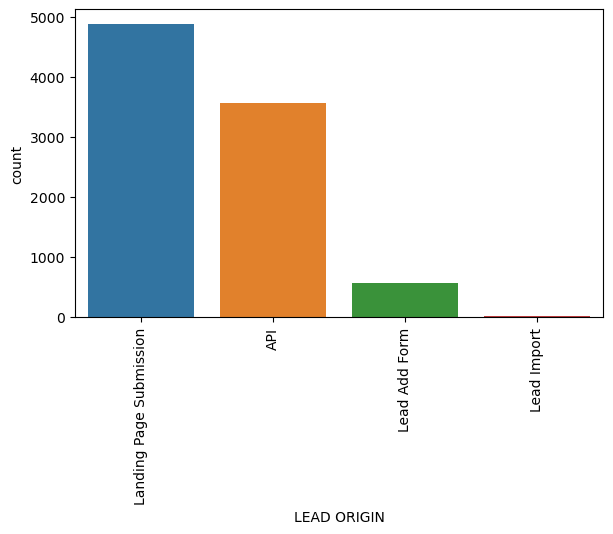

LEAD SOURCE


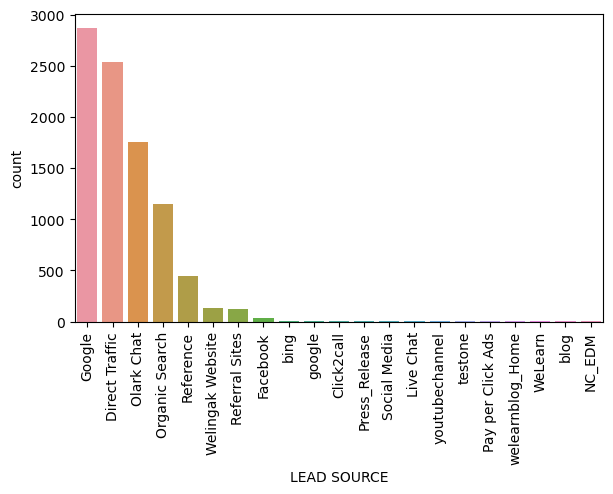

DO NOT EMAIL


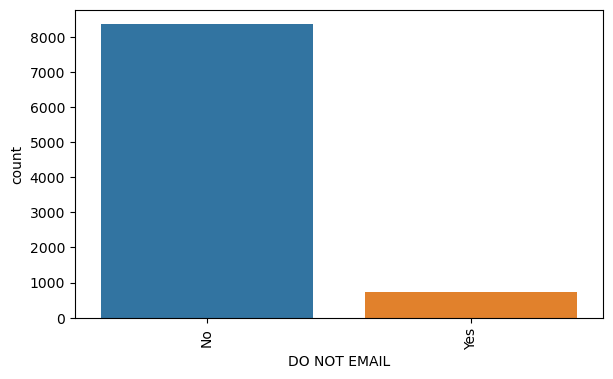

DO NOT CALL


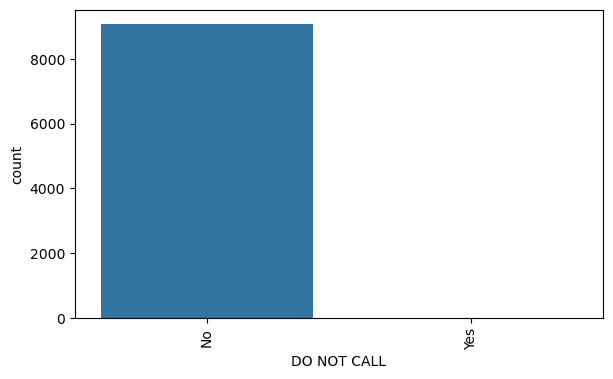

LAST ACTIVITY


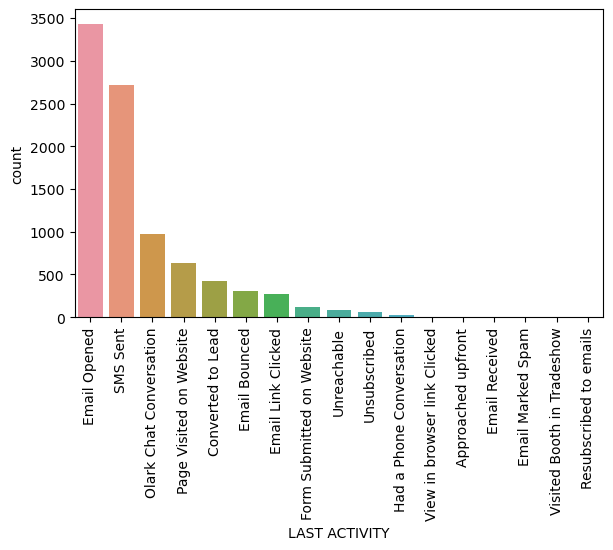

COUNTRY


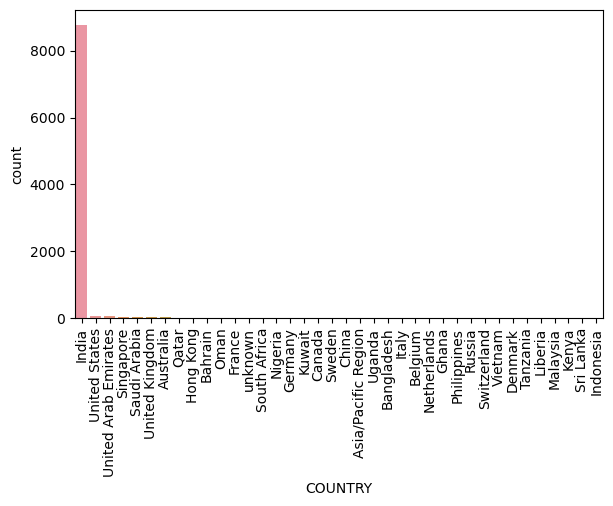

SPECIALIZATION


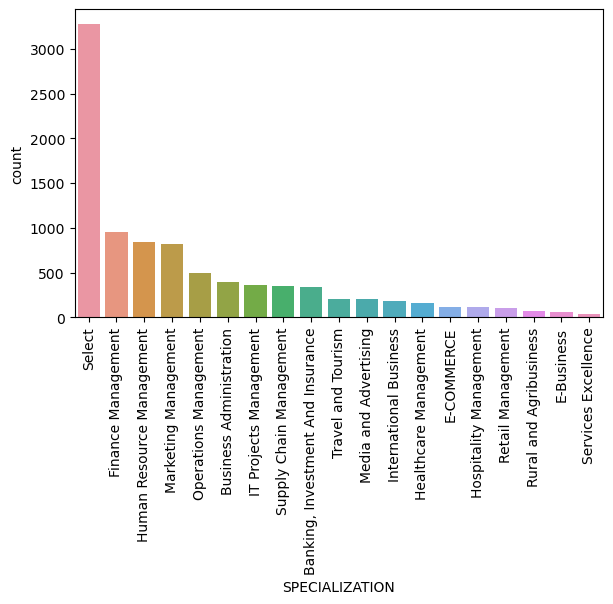

WHAT IS YOUR CURRENT OCCUPATION


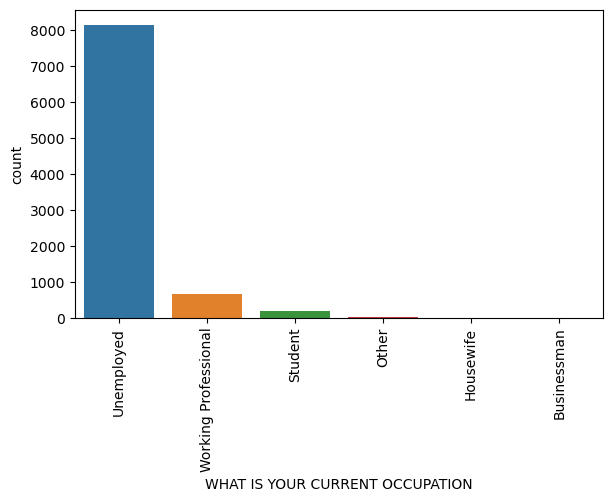

SEARCH


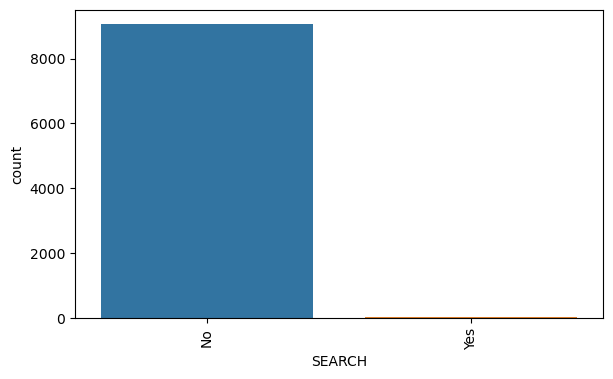

MAGAZINE


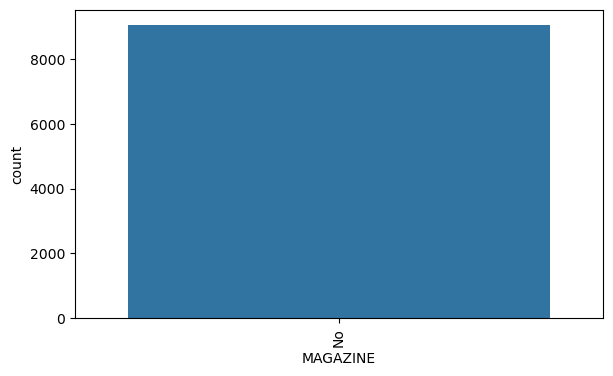

NEWSPAPER ARTICLE


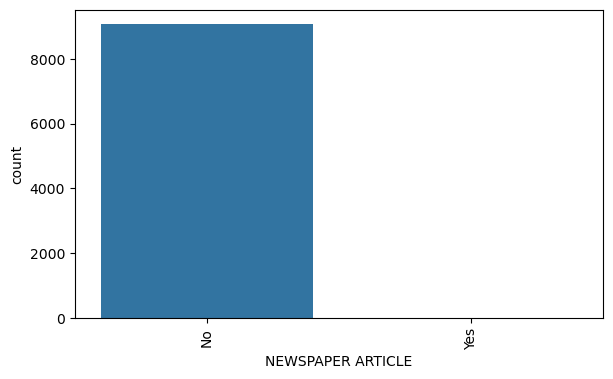

X EDUCATION FORUMS


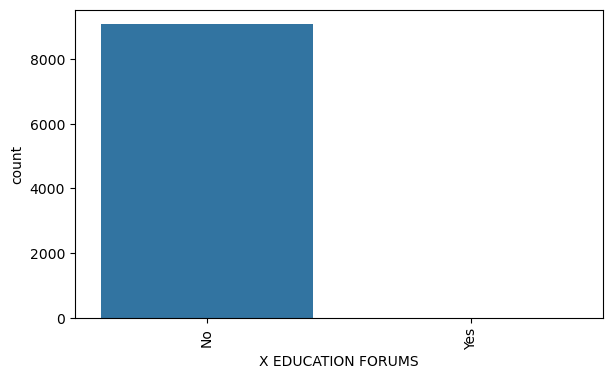

NEWSPAPER


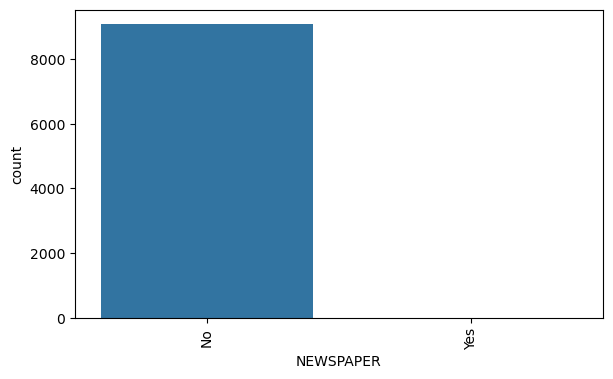

DIGITAL ADVERTISEMENT


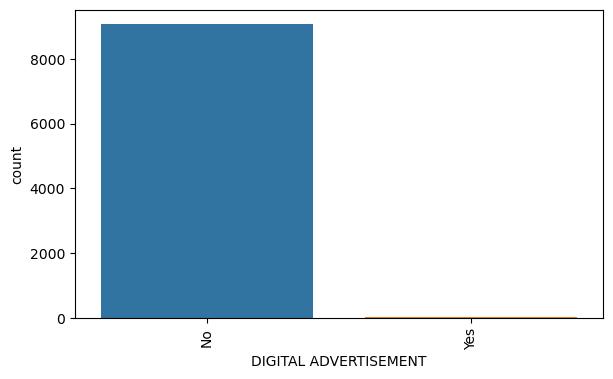

THROUGH RECOMMENDATIONS


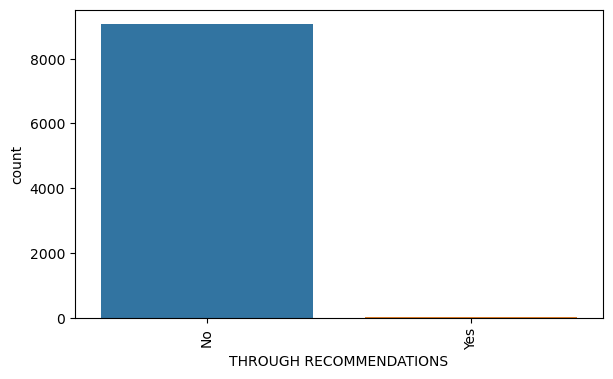

RECEIVE MORE UPDATES ABOUT OUR COURSES


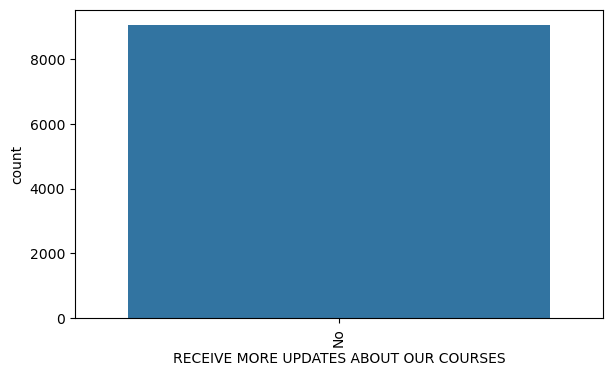

TAGS


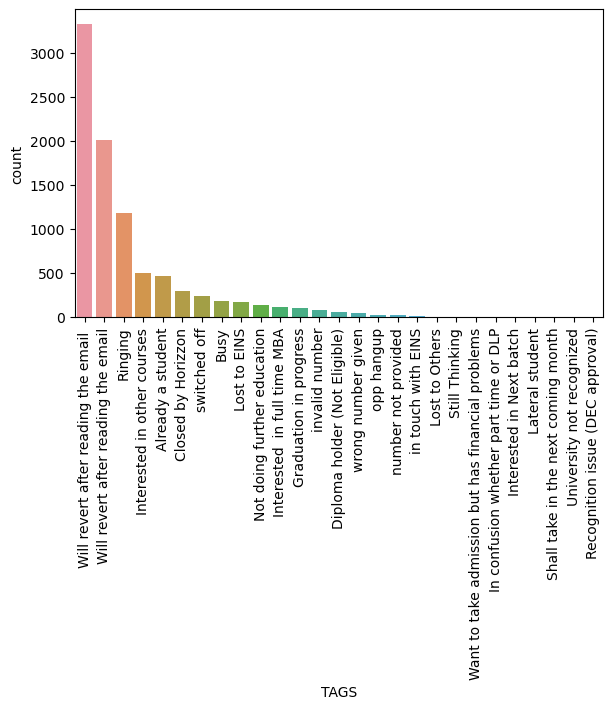

UPDATE ME ON SUPPLY CHAIN CONTENT


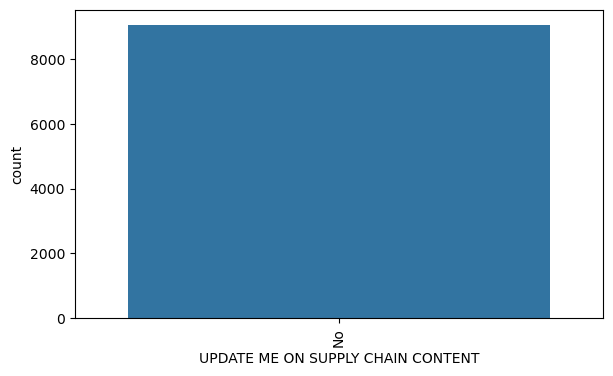

GET UPDATES ON DM CONTENT


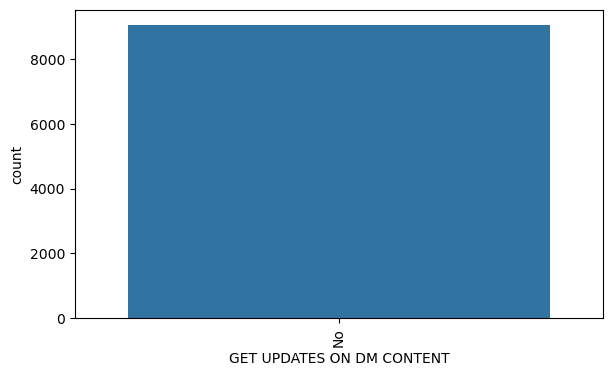

CITY


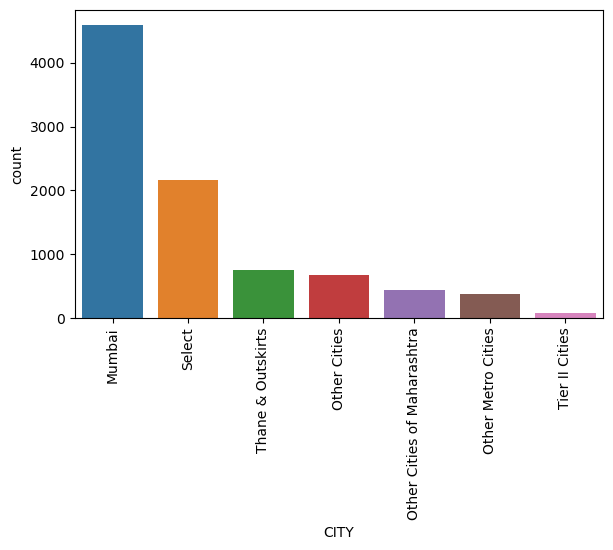

I AGREE TO PAY THE AMOUNT THROUGH CHEQUE


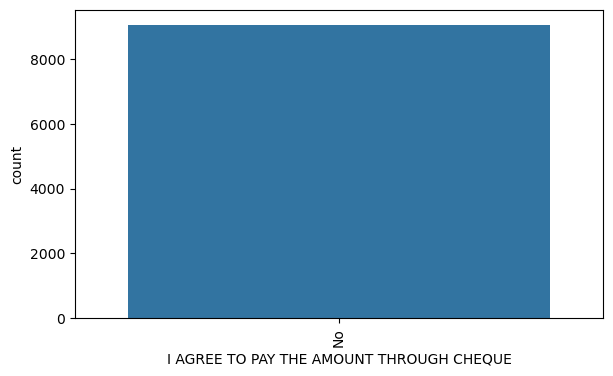

A FREE COPY OF MASTERING THE INTERVIEW


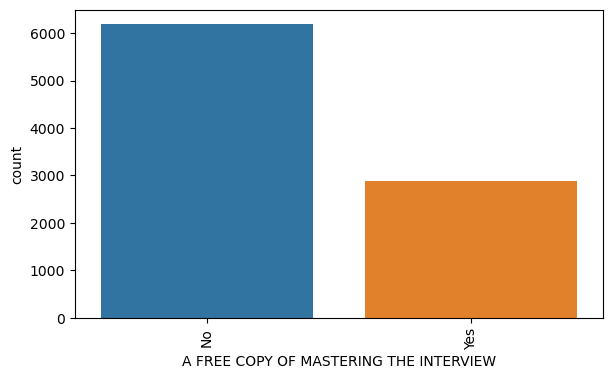

LAST NOTABLE ACTIVITY


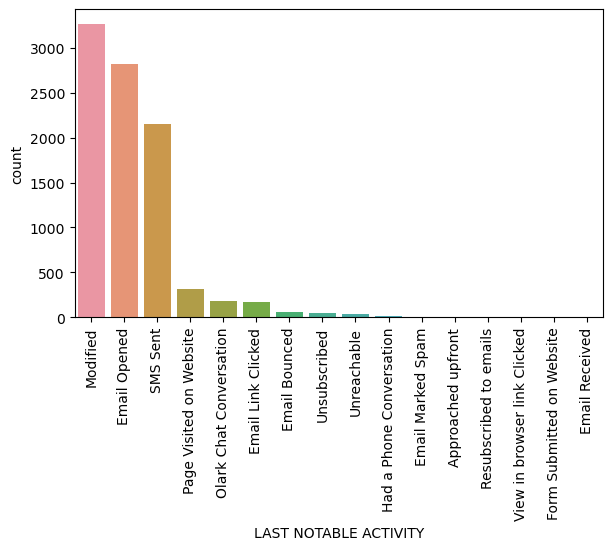

In [128]:
for col in cat:
    print(col.upper())
    #print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.countplot(x=df[col],order=df[col].value_counts(normalize=True).index)
    plt.xlabel(col.upper())
    plt.xticks(rotation=90)
    plt.show()                                 
        
        

In [129]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


LEAD ORIGIN


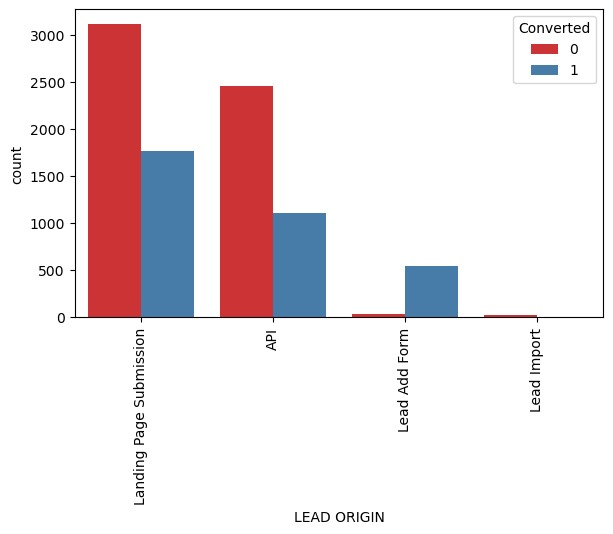

LEAD SOURCE


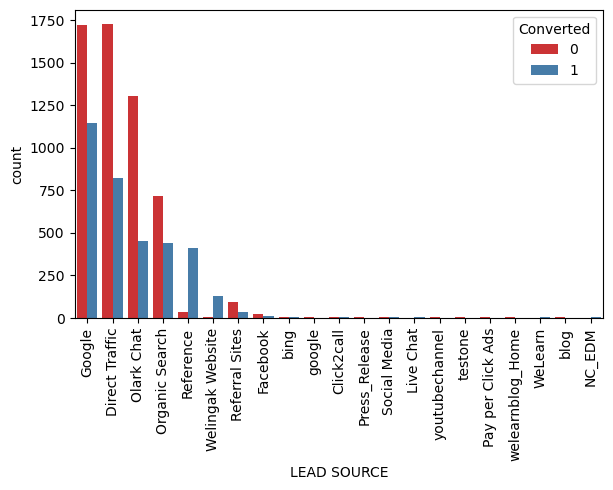

DO NOT EMAIL


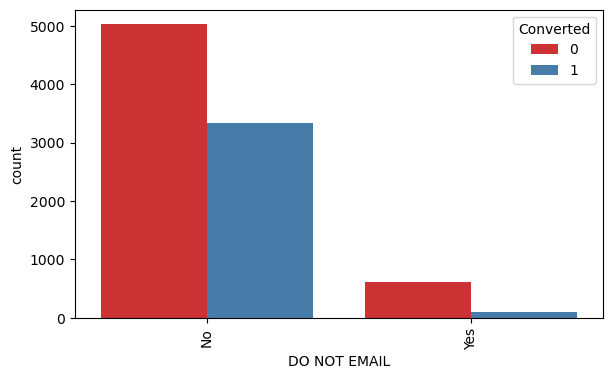

DO NOT CALL


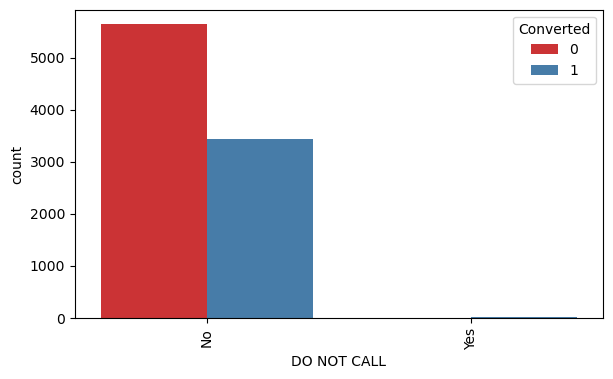

LAST ACTIVITY


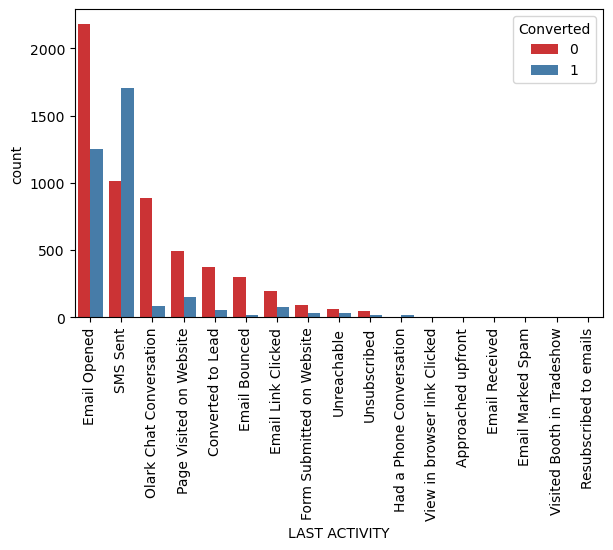

COUNTRY


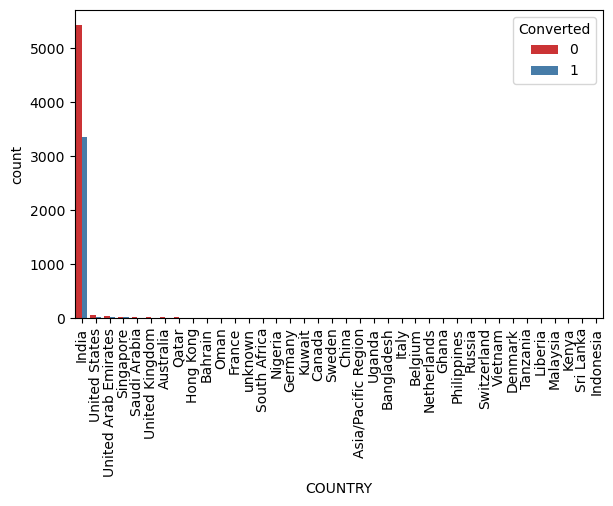

SPECIALIZATION


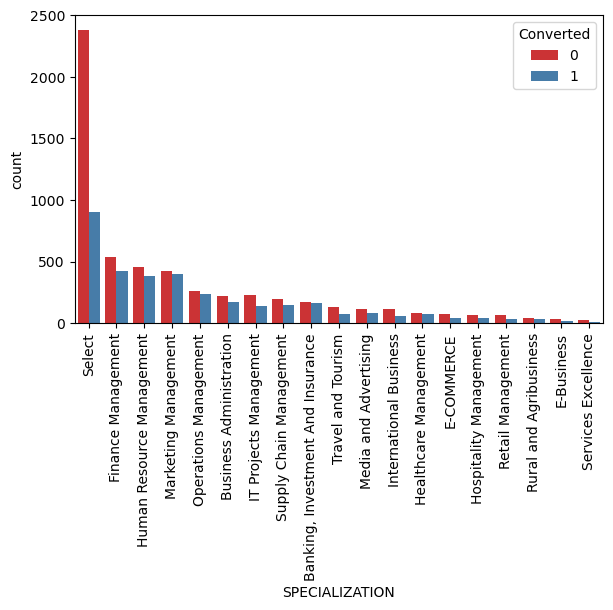

WHAT IS YOUR CURRENT OCCUPATION


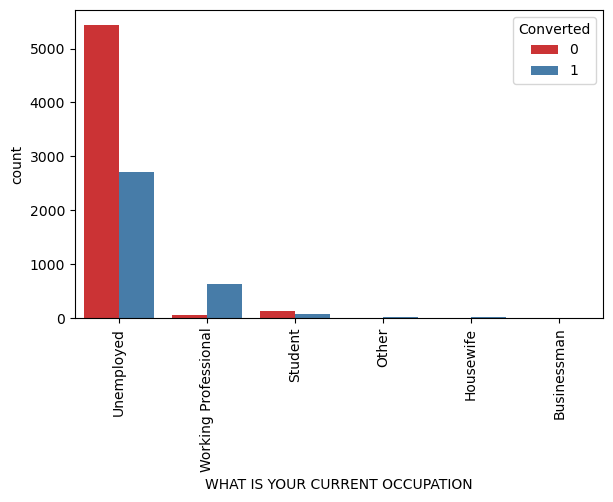

SEARCH


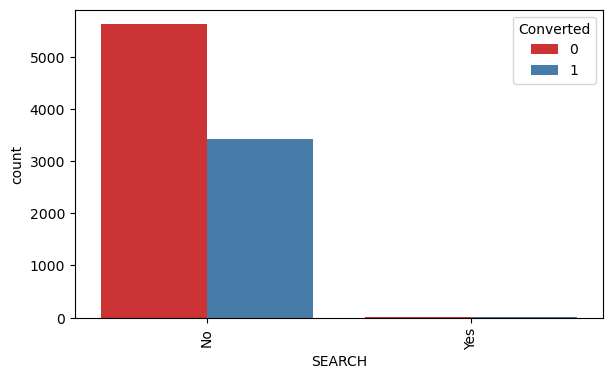

MAGAZINE


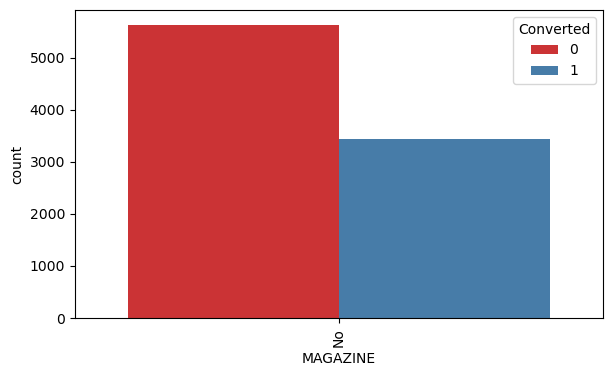

NEWSPAPER ARTICLE


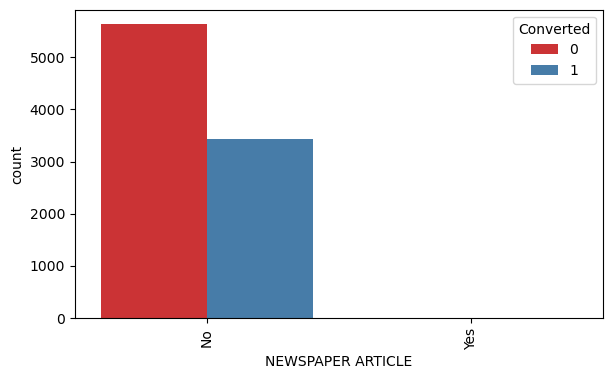

X EDUCATION FORUMS


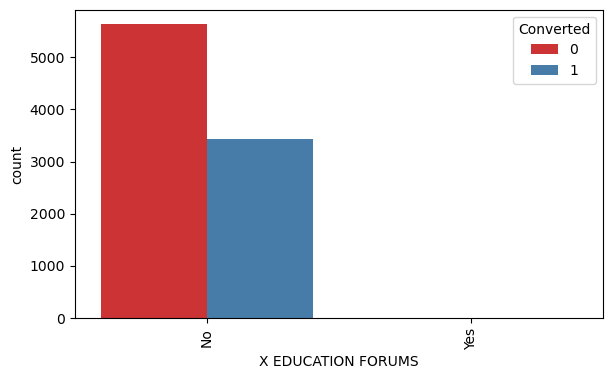

NEWSPAPER


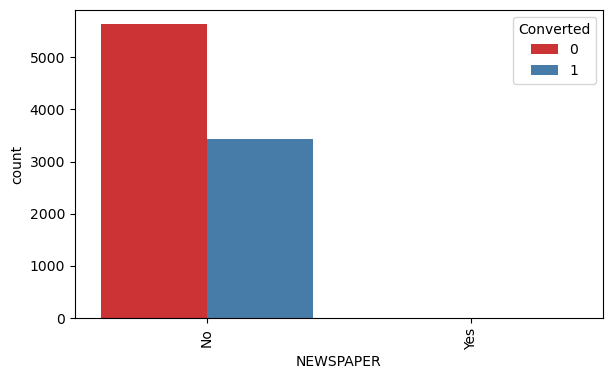

DIGITAL ADVERTISEMENT


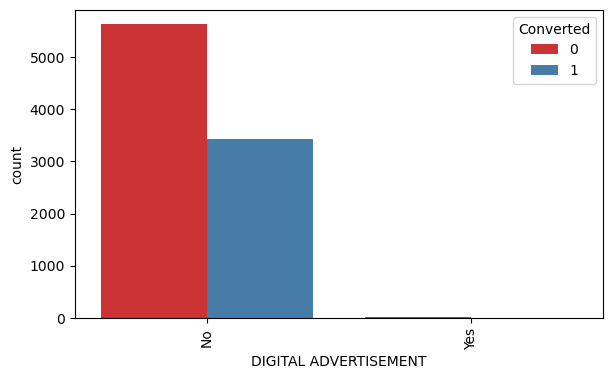

THROUGH RECOMMENDATIONS


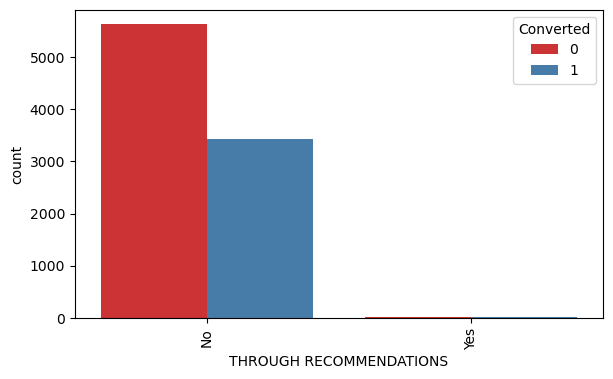

RECEIVE MORE UPDATES ABOUT OUR COURSES


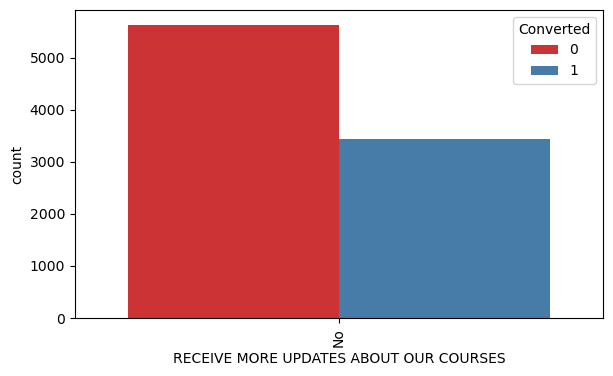

TAGS


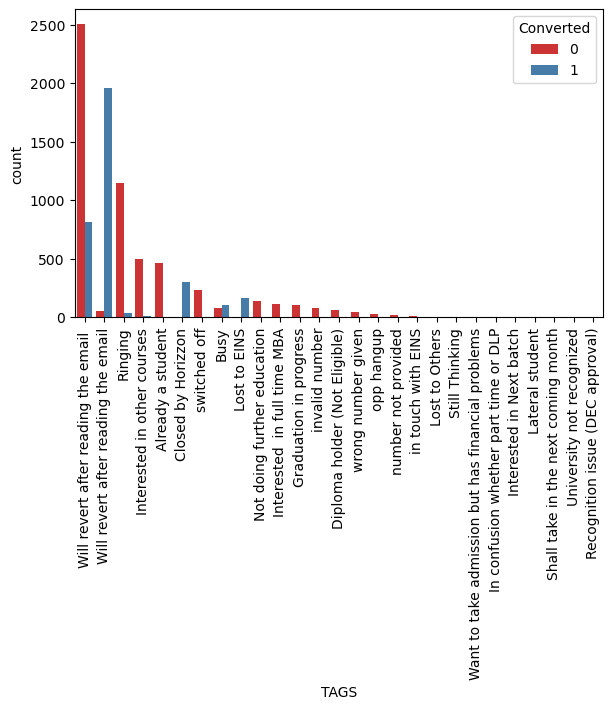

UPDATE ME ON SUPPLY CHAIN CONTENT


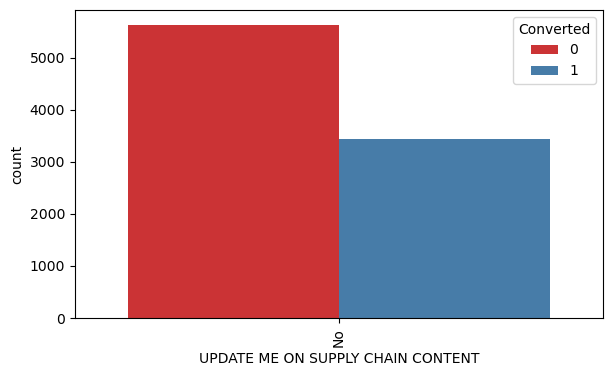

GET UPDATES ON DM CONTENT


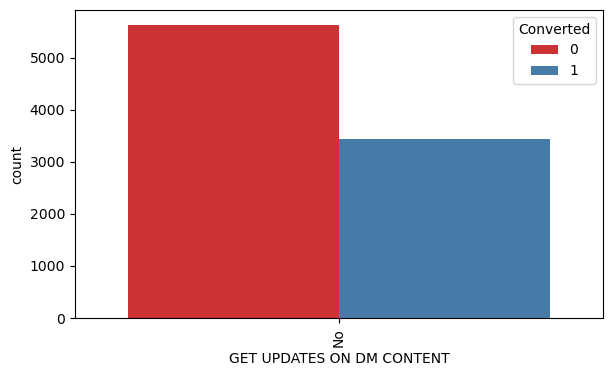

CITY


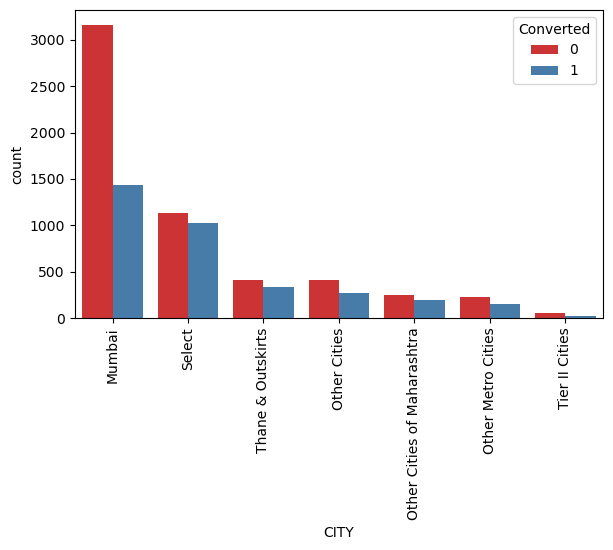

I AGREE TO PAY THE AMOUNT THROUGH CHEQUE


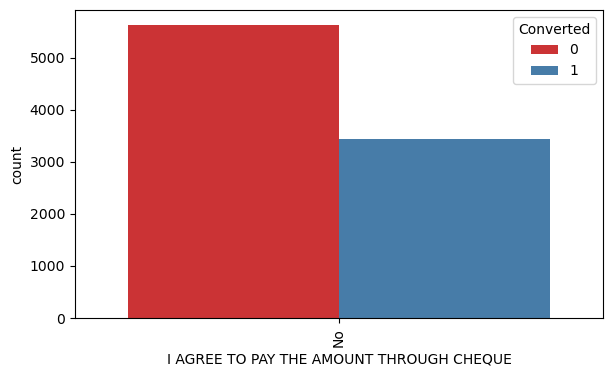

A FREE COPY OF MASTERING THE INTERVIEW


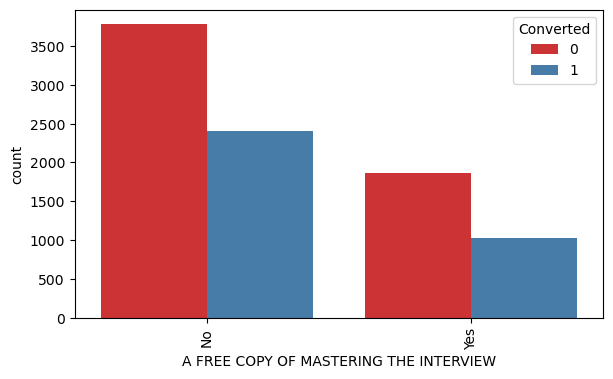

LAST NOTABLE ACTIVITY


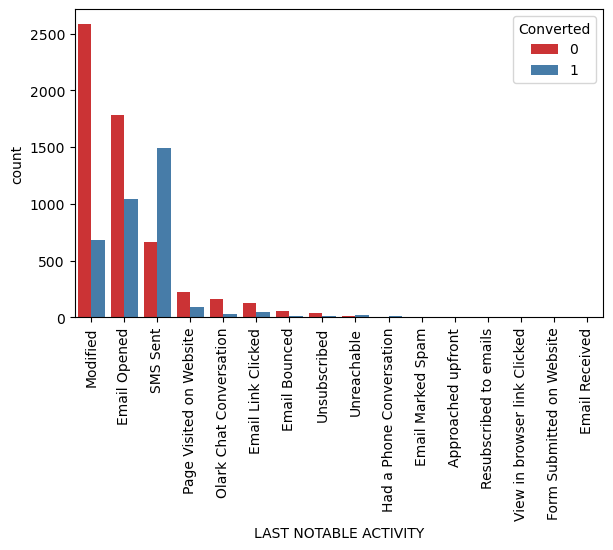

In [141]:
for col in cat:
    print(col.upper())
    #print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.countplot(x=df[col],hue=df["Converted"],order=df[col].value_counts(normalize=True).index,palette='Set1')
    plt.xlabel(col.upper())
    plt.xticks(rotation=90)
    plt.show()

LEAD ORIGIN


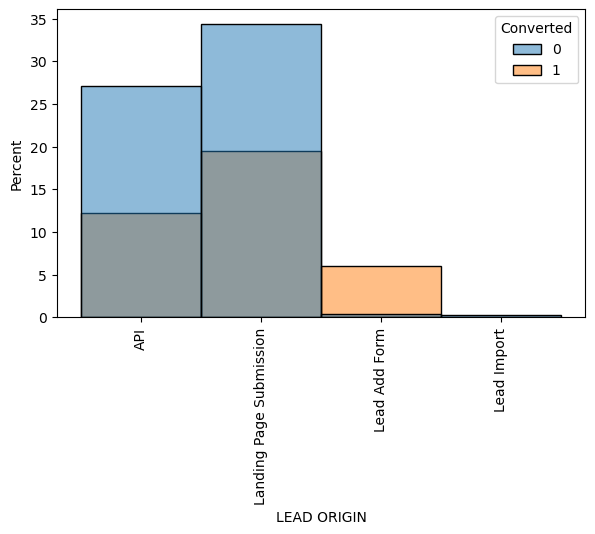

LEAD SOURCE


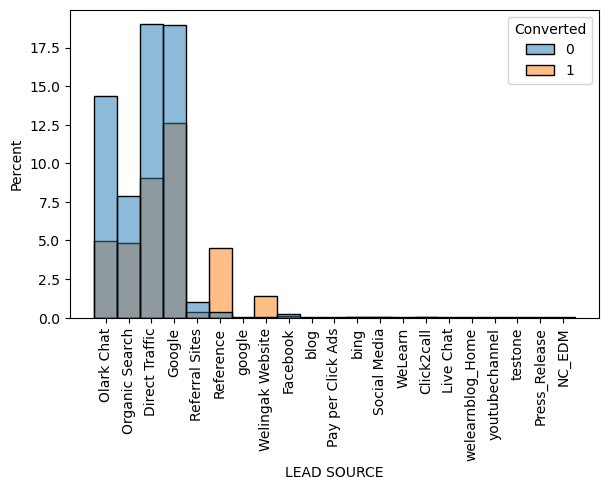

DO NOT EMAIL


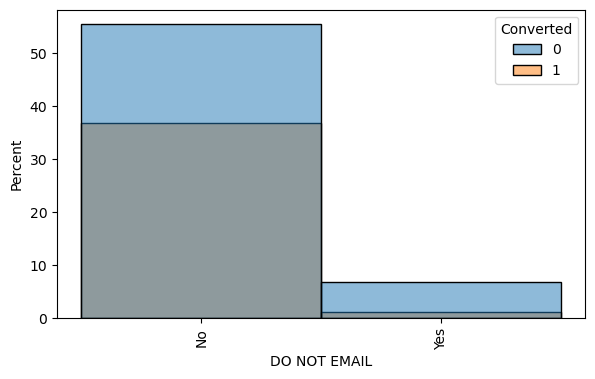

DO NOT CALL


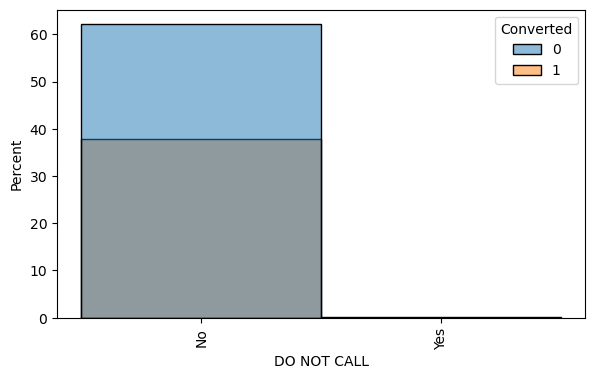

LAST ACTIVITY


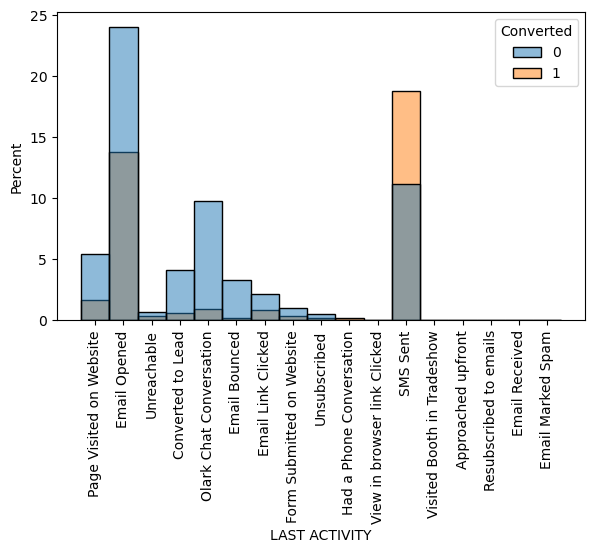

COUNTRY


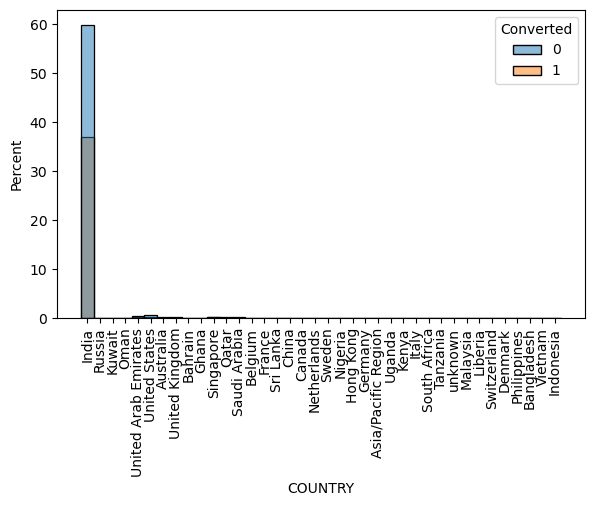

SPECIALIZATION


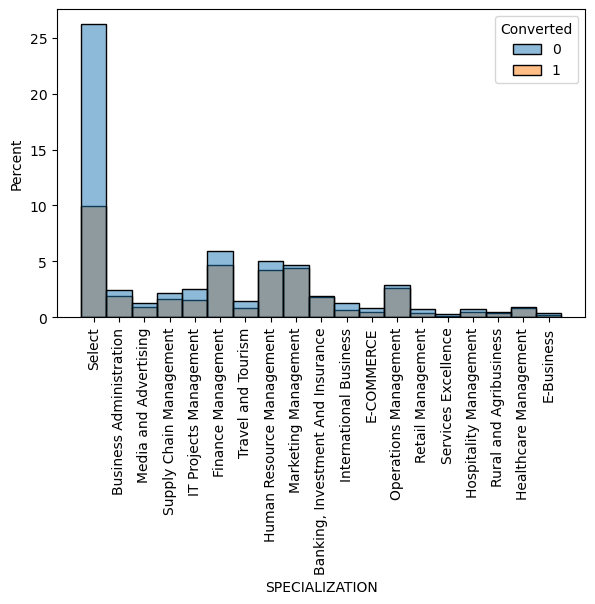

WHAT IS YOUR CURRENT OCCUPATION


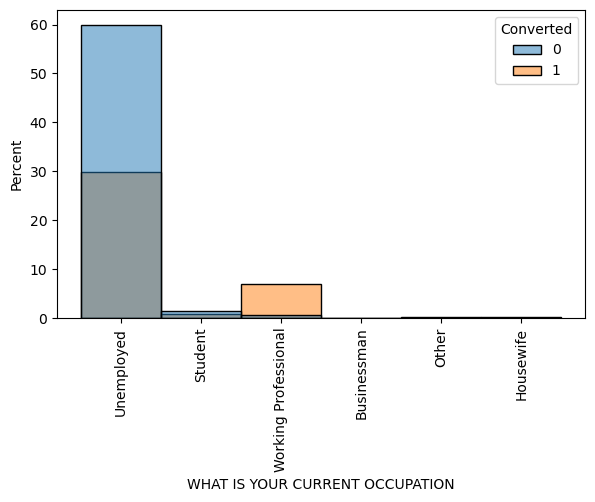

SEARCH


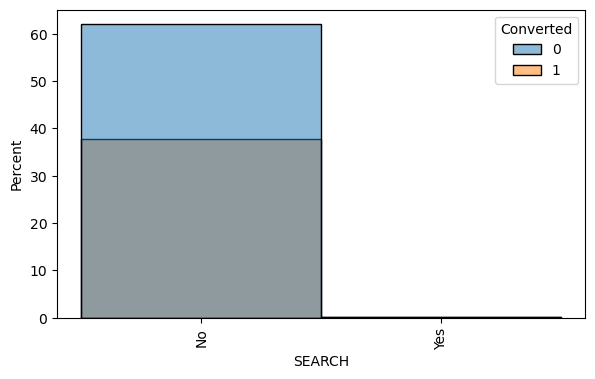

MAGAZINE


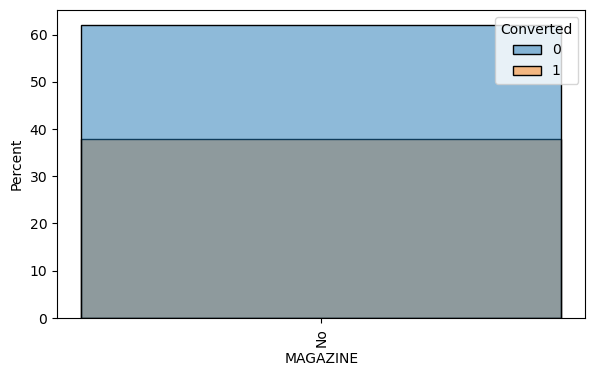

NEWSPAPER ARTICLE


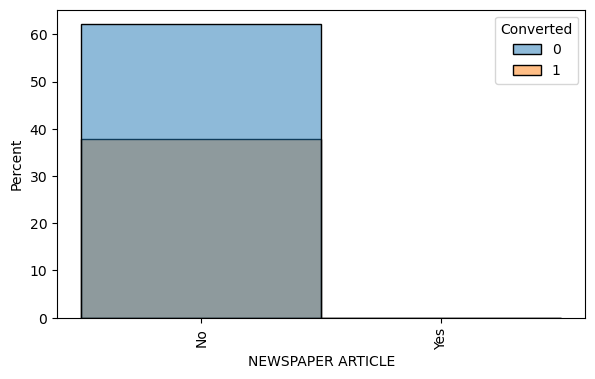

X EDUCATION FORUMS


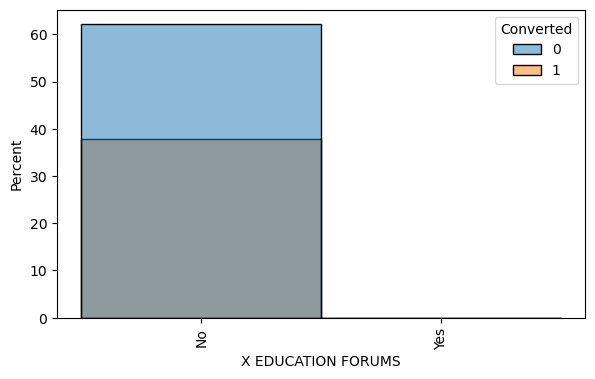

NEWSPAPER


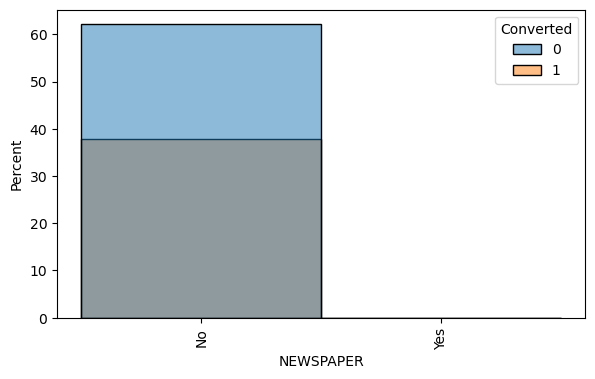

DIGITAL ADVERTISEMENT


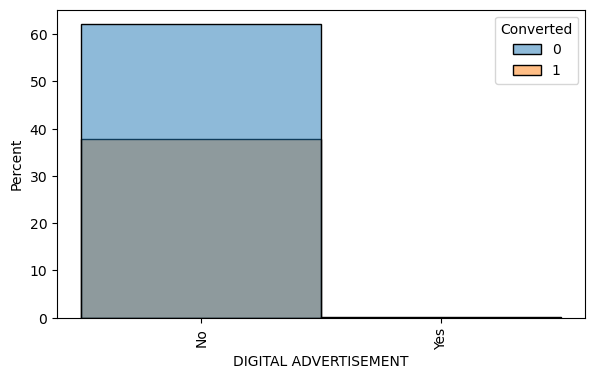

THROUGH RECOMMENDATIONS


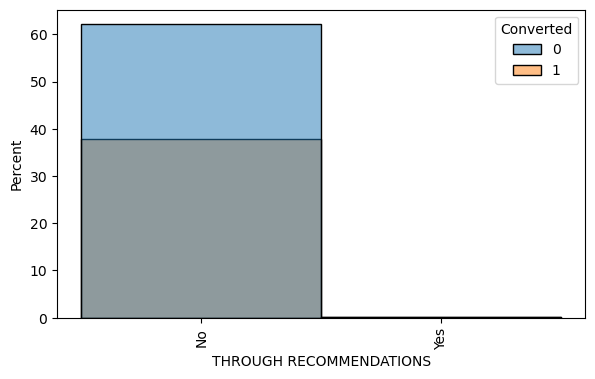

RECEIVE MORE UPDATES ABOUT OUR COURSES


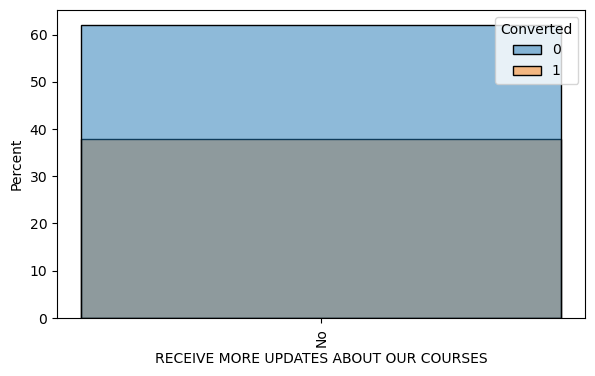

TAGS


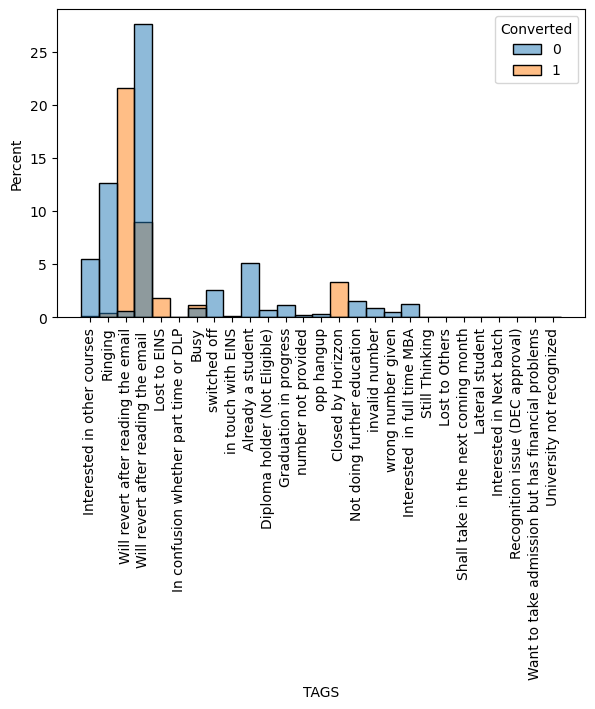

UPDATE ME ON SUPPLY CHAIN CONTENT


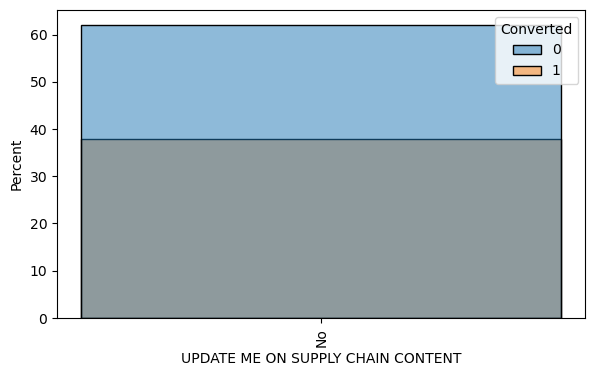

GET UPDATES ON DM CONTENT


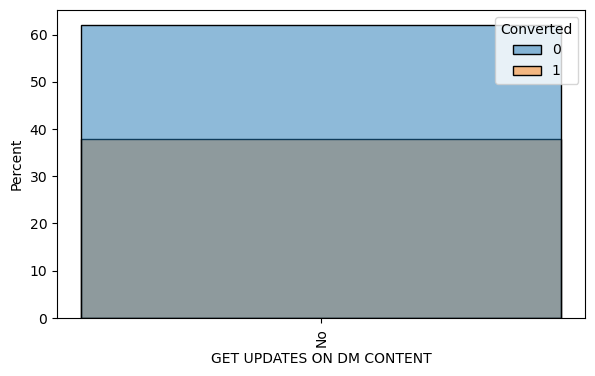

CITY


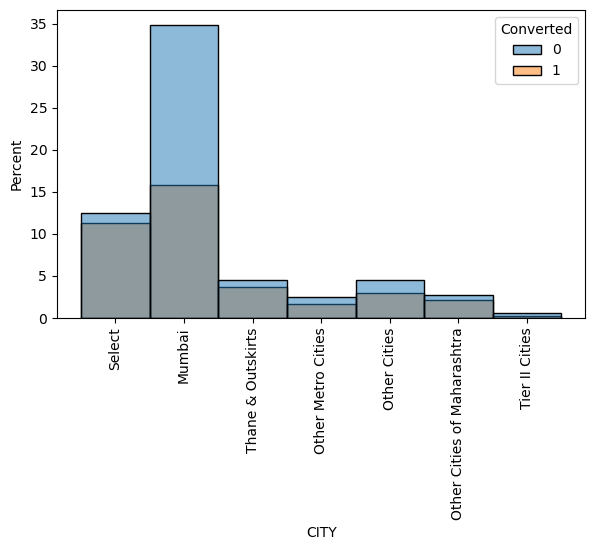

I AGREE TO PAY THE AMOUNT THROUGH CHEQUE


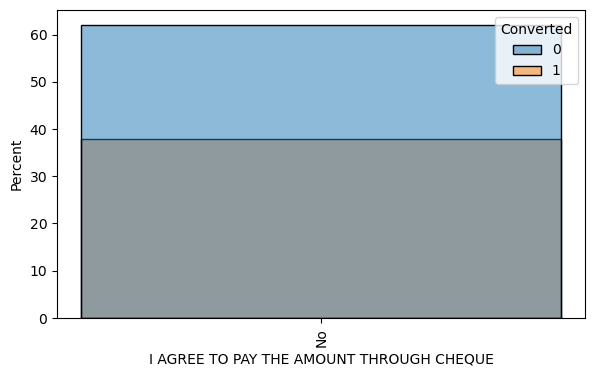

A FREE COPY OF MASTERING THE INTERVIEW


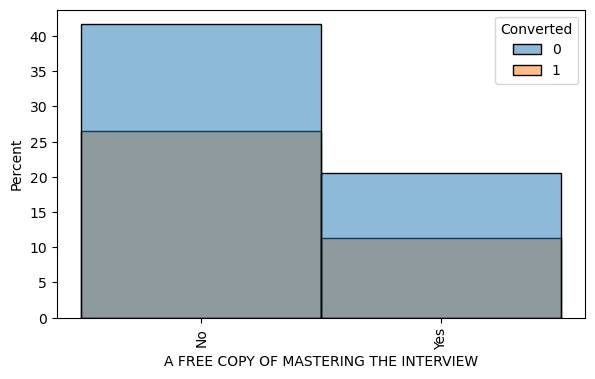

LAST NOTABLE ACTIVITY


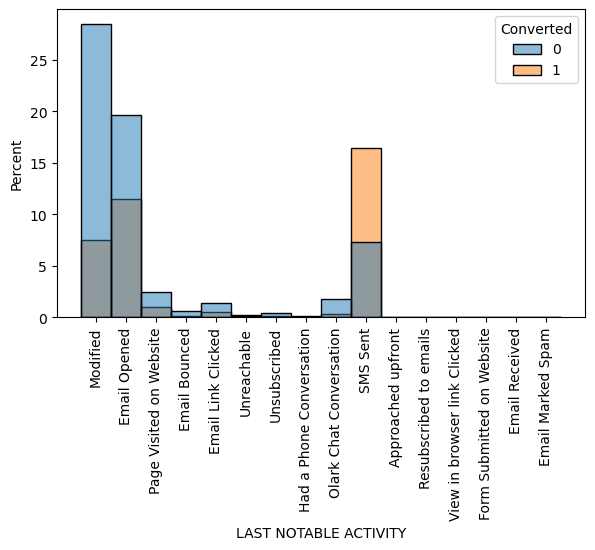

In [143]:
for col in cat:
    print(col.upper())
    #print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col],hue=df["Converted"],stat="percent")
    plt.xlabel(col.upper())
    plt.xticks(rotation=90)
    plt.show()

Inference:
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

Lead Add Form has more than 90% conversion rate but count of lead are not very high.

Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

    

LEAD SOURCE:
Since many parametres are less.we can merge the values into others

In [290]:
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [291]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

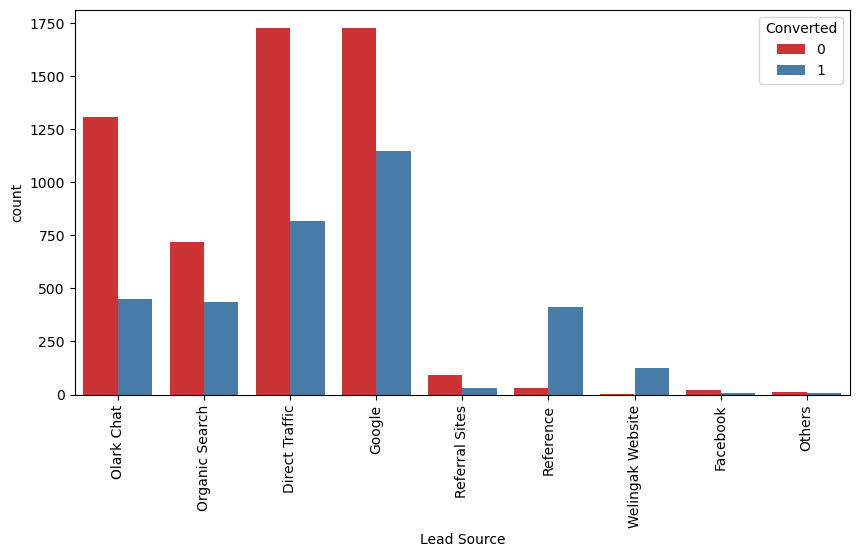

In [148]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference:

Google and Direct traffic generates maximum number of leads.

Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [149]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


Count Plot of Lead source

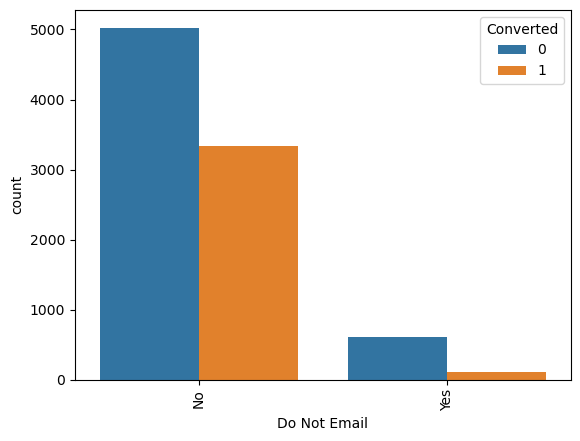

In [155]:
sns.countplot(x="Do Not Email",data=df,hue="Converted",order=df["Do Not Email"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Inference:
Maximum entries are NO.Hence, No proper conclusion.
Maximum percentage of the population dont want the email to be send to them.
Only 14.5 % of the population were converted after sending the mail.


In [188]:
(df.groupby(by="Do Not Email").Converted.value_counts(normalize=True)*100)

Do Not Email  Converted
No            0            60.145968
              1            39.854032
Yes           0            85.474860
              1            14.525140
Name: Converted, dtype: float64

Visualising Do not Call

<Axes: xlabel='Do Not Call', ylabel='count'>

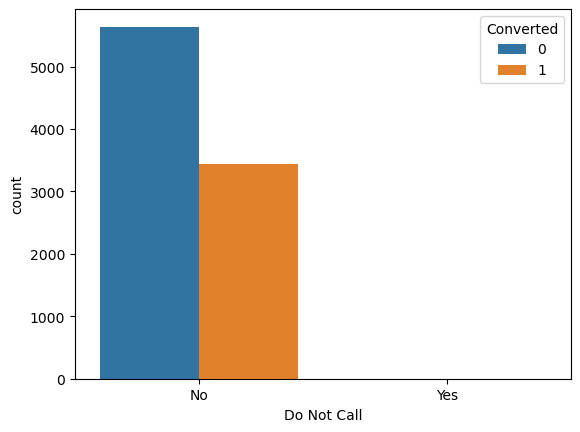

In [190]:
sns.countplot(x="Do Not Call",data=df,hue="Converted")

In [191]:
df.groupby(by="Do Not Call").Converted.value_counts()

Do Not Call  Converted
No           0            5639
             1            3433
Yes          1               2
Name: Converted, dtype: int64

INference:
No customer wants to be called about the course

# Last Activity	

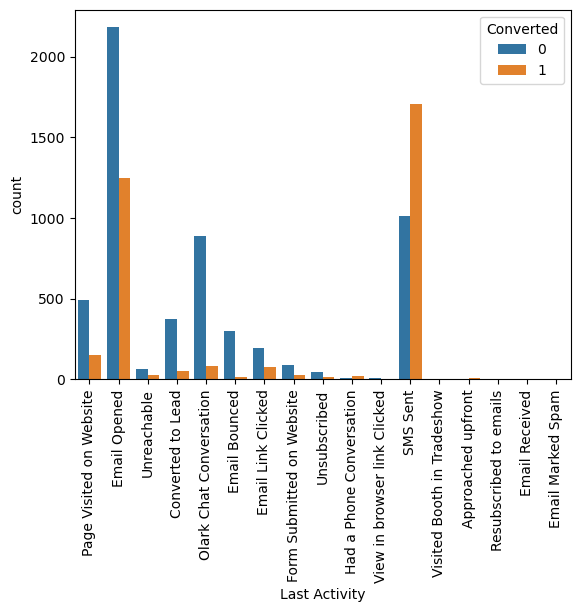

In [195]:
sns.countplot(x="Last Activity",data=df,hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [292]:
# We can club the last activities to "Other_Activity" which are having less data.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


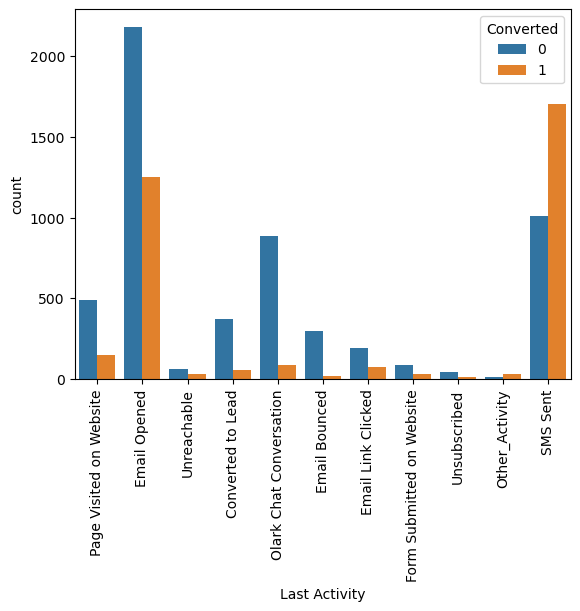

In [198]:
sns.countplot(x="Last Activity",data=df,hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [206]:
df.groupby(by="Converted")["Last Activity"].value_counts(normalize=True)

Converted  Last Activity            
0          Email Opened                 0.386948
           SMS Sent                     0.179287
           Olark Chat Conversation      0.157475
           Page Visited on Website      0.086718
           Converted to Lead            0.066324
           Email Bounced                0.052492
           Email Link Clicked           0.034403
           Form Submitted on Website    0.015606
           Unreachable                  0.010818
           Unsubscribed                 0.007980
           Other_Activity               0.001951
1          SMS Sent                     0.496361
           Email Opened                 0.363901
           Page Visited on Website      0.043959
           Olark Chat Conversation      0.024454
           Email Link Clicked           0.021252
           Converted to Lead            0.015721
           Other_Activity               0.009025
           Unreachable                  0.008443
           Form Submitted on Web


Inference¶
Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.


In [207]:
# Catplot of COuntry

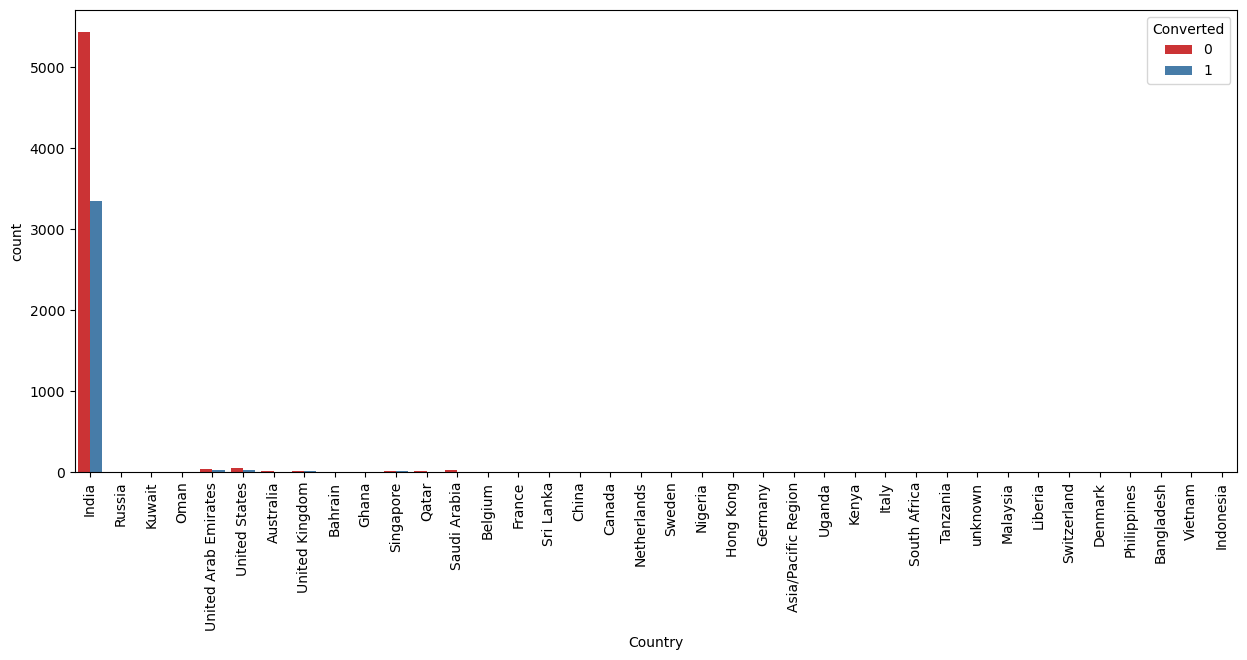

In [209]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference: India is having maximum customers

# Specialization

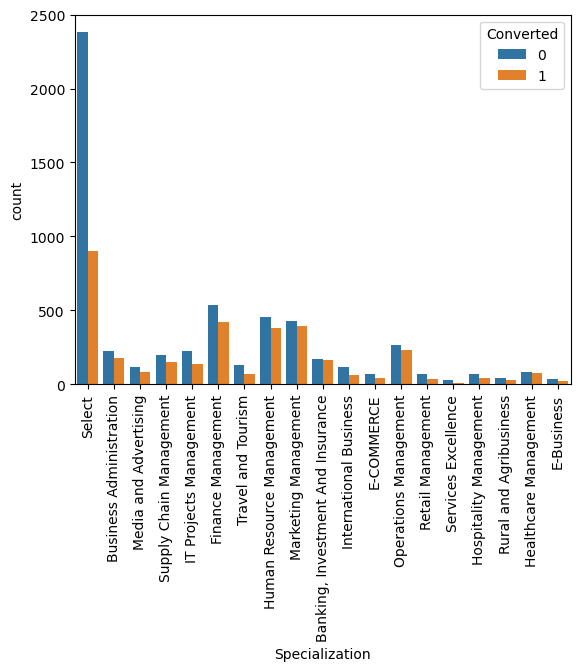

In [214]:
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

Inference:
FM. HRM Operations & banking are the most sought specilization who got converted

# Occupation

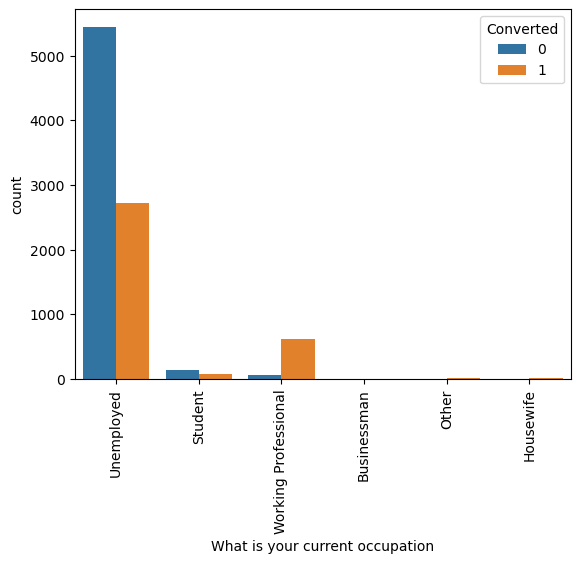

In [217]:

sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

# Inference:
Target should be WOrking Professional

# City

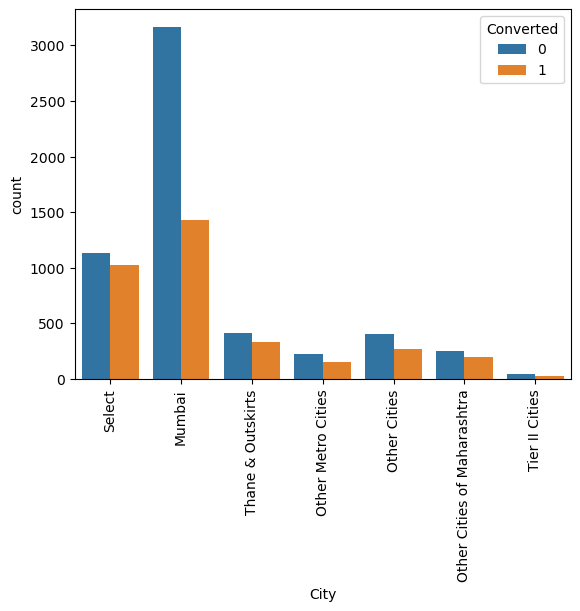

In [221]:
sns.countplot(x="City",data=df,hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [233]:
df.groupby(by=["City"]).Converted.value_counts(normalize=True)

City                         Converted
Mumbai                       0            0.688642
                             1            0.311358
Other Cities                 0            0.600000
                             1            0.400000
Other Cities of Maharashtra  0            0.560538
                             1            0.439462
Other Metro Cities           0            0.591512
                             1            0.408488
Select                       0            0.524583
                             1            0.475417
Thane & Outskirts            0            0.554362
                             1            0.445638
Tier II Cities               0            0.662162
                             1            0.337838
Name: Converted, dtype: float64

# Inference:
TOP City is MUMBAI with almost 31 % conversion rate 

# Last Notable Activity¶

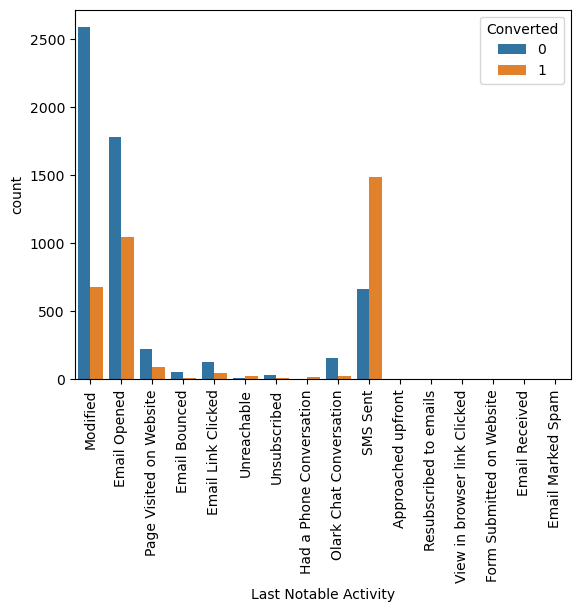

In [236]:
sns.countplot(x="Last Notable Activity",data=df,hue="Converted")
plt.xticks(rotation=90)
plt.show()

Inference:
SMS Sent has highest cinversion rate followed by Email Opened & Modified.

Following columns are not having any significant impact on the column as most of the columns have no impact on the conversion rate.

'Lead Number',
'Tags',
'Country',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview'

Therfore, the above columns are dropped

In [293]:
df = df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [44]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


In [294]:
df.shape# Only 14 columns are there in dataset

(9074, 14)

Analysis of the Target Variable


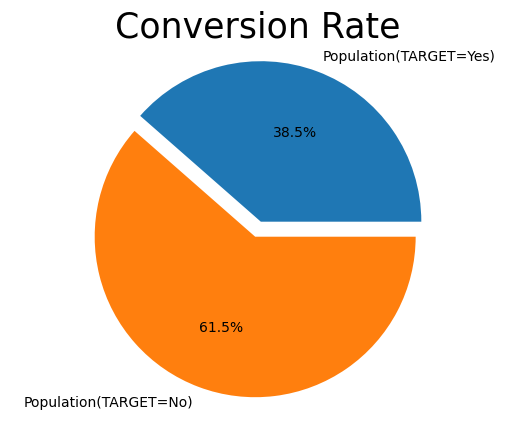

In [16]:
#Let’s check the distribution of the target variable visually using a pie chart.

count1 = 0
count0 = 0
for i in df['Converted'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['Converted']))*100
count0 = (count0/len(df['Converted']))*100
x = ['Population(TARGET=Yes)','Population(TARGET=No)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice
fig, ax = plt.subplots()
ax.pie(y, explode=explode,labels=x, autopct='%1.1f%%',)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Conversion Rate',fontsize=25)
plt.show()

Inference:
The percentage of candidates not getting converted is 62% while the percentage which got converted is 37.9%
Data is Imbalanced

# Numerical Category

In [295]:
num=["Total Time Spent on Website","Page Views Per Visit","TotalVisits"]

Total Time Spent on Website
Skew : 0.97


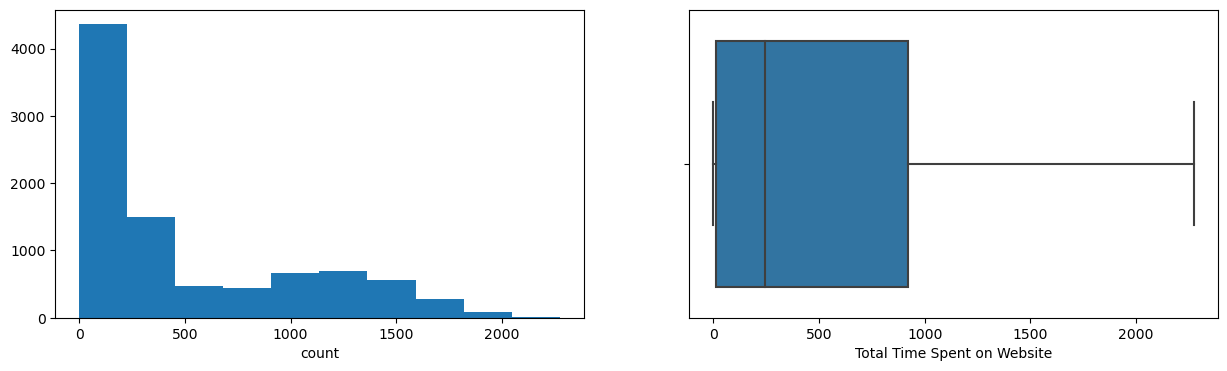

Page Views Per Visit
Skew : 2.88


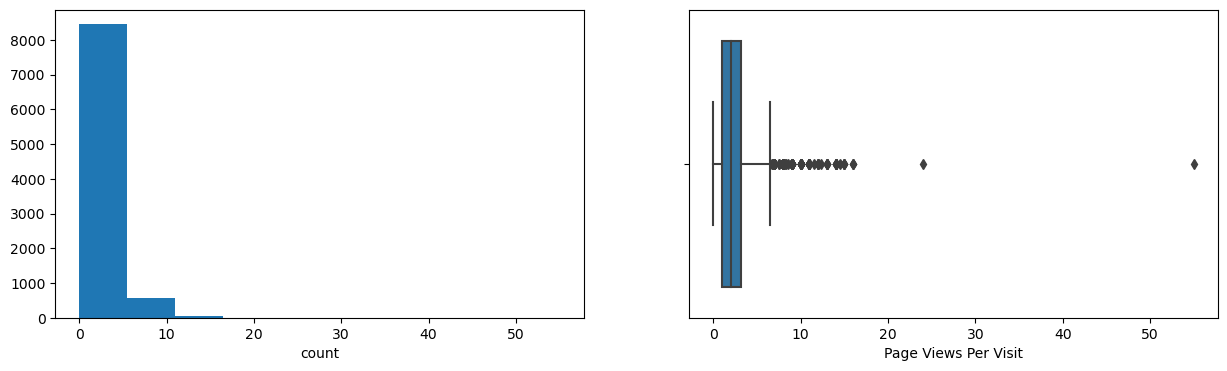

TotalVisits
Skew : 19.92


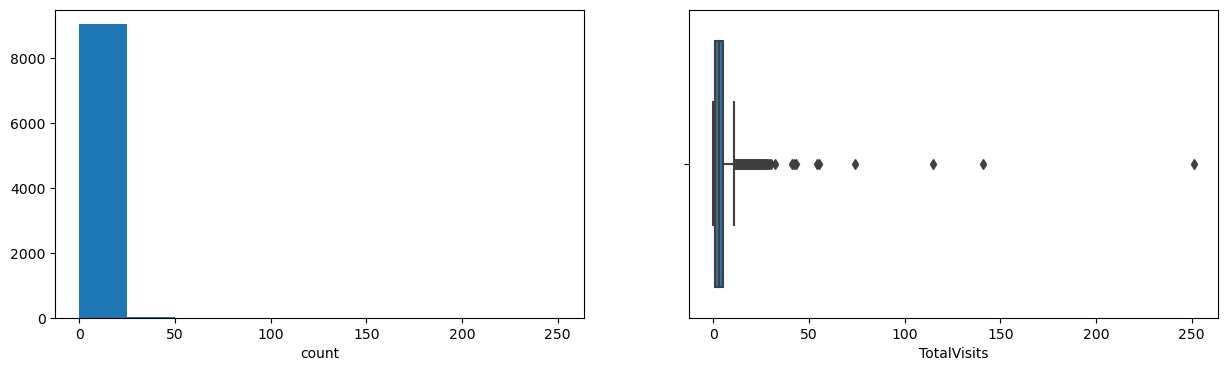

In [296]:
for col in num:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10,grid=False)
    plt.xlabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

#Inference:
Right Skewed Data
Outlier Treatment to be done for Pages per visit & Total visits

In [46]:
df["TotalVisits"].describe(percentiles=[0.25,0.50,0.75,.90,.95])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [297]:
#capping the oultier
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='TotalVisits'>

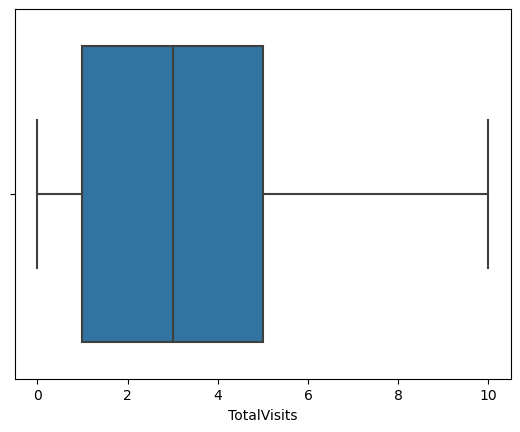

In [298]:
sns.boxplot(x=df['TotalVisits'])

In [ ]:
# Treatment of outlier done

In [49]:
df["Page Views Per Visit"].describe(percentiles=[0.25,0.50,0.75,.90,.95])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [299]:
#capping the oultier
percentiles = df['Page Views Per Visit'].quantile([0.05,0.90]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Page Views Per Visit'>

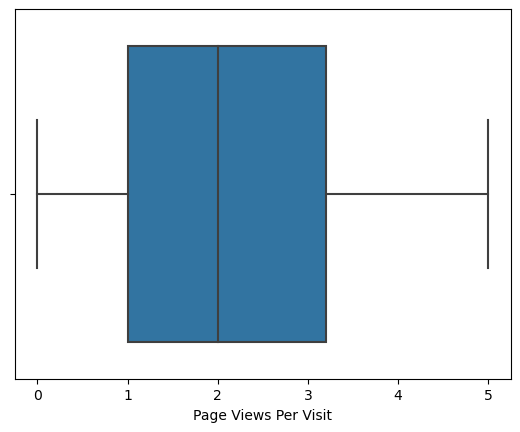

In [300]:
sns.boxplot(x=df['Page Views Per Visit'])

In [ ]:
# Treatment of the Outlier is completd

# Data preparation

In [52]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


Encoding the data

In [301]:
df["Do Not Email"]=df["Do Not Email"].replace({"No":0,"Yes":1})
df["Do Not Call"]=df["Do Not Call"].replace({"No":0,"Yes":1})

In [56]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


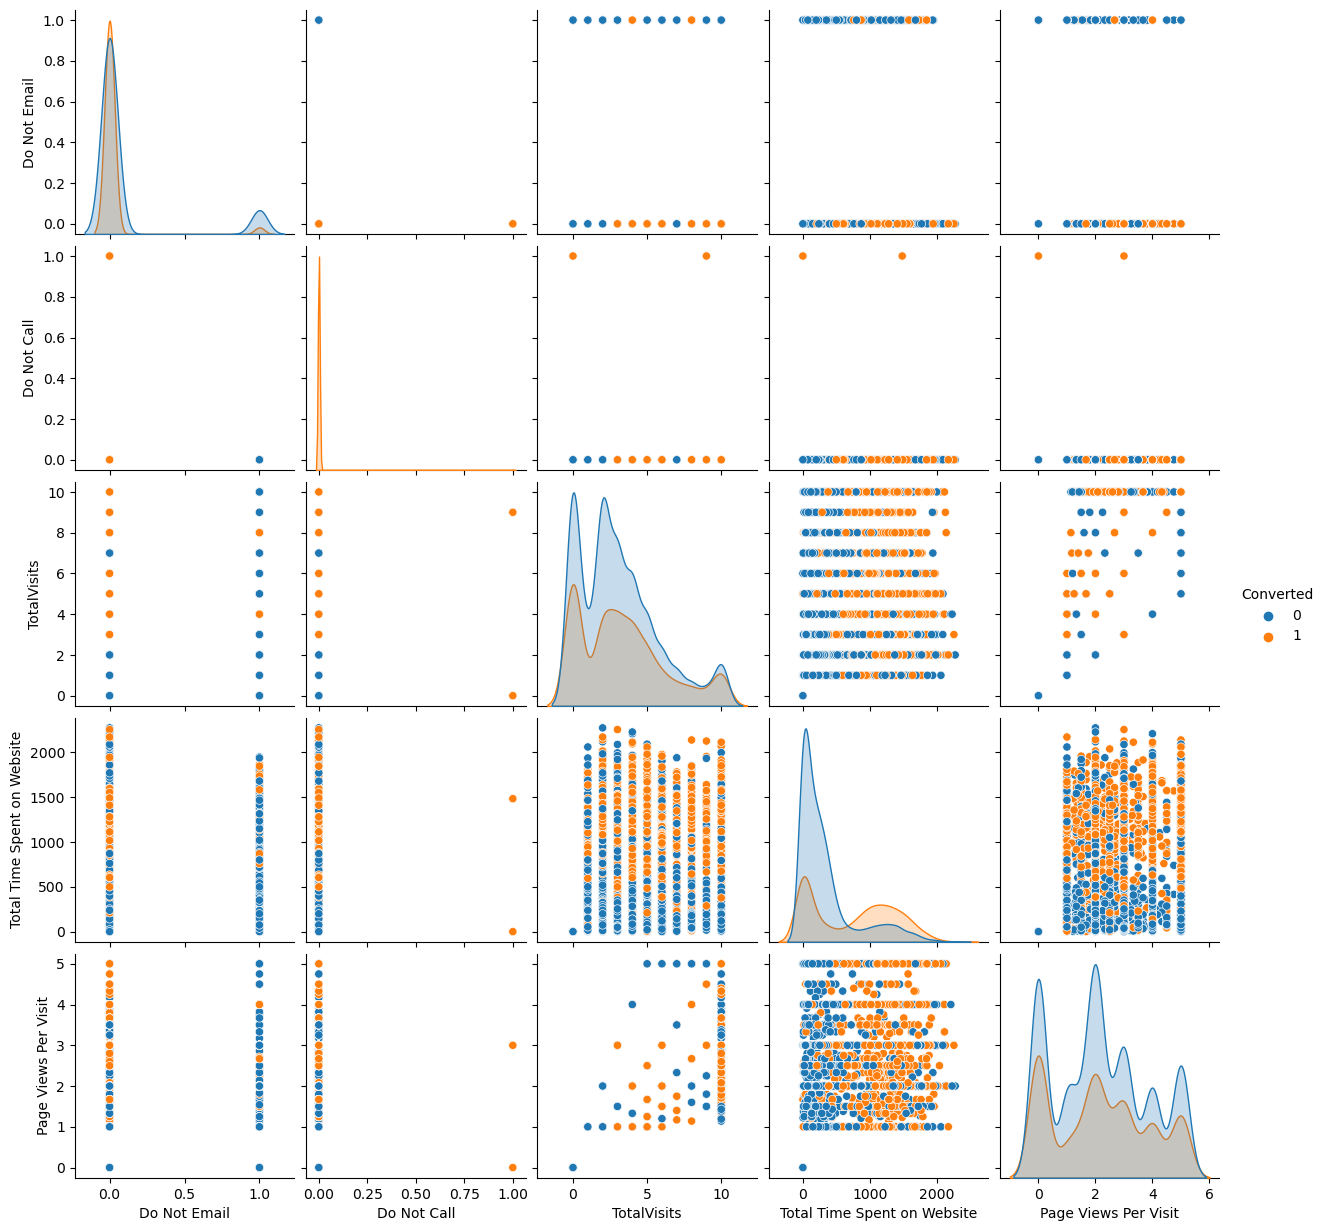

In [61]:
sns.pairplot(data=df,hue="Converted")

<Axes: >

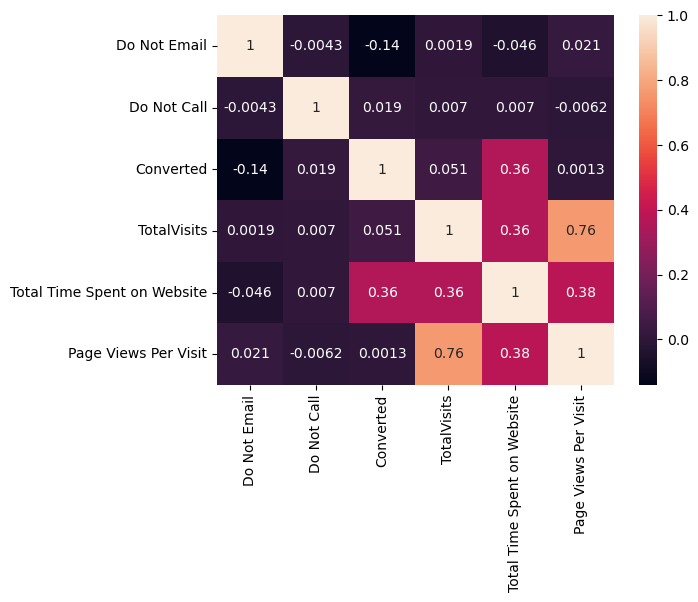

In [302]:
sns.heatmap(data=df.corr(),annot=True)

Inference:
The heatmap shows some useful insights:

Correlation of COnverted with independent variables:

Count('COnverted') is not correlated with other varaibles, except with Total time spent on website, where the degree of correlation is 0.36


Correlation among independent variables:

Some of the independent variables are highly correlated (look at the top-left part of matrix): total visist & Total time spent on website are highly (positively) correlated. The correlation between the two is almost equal to .76.

Thus, while building the model, we'll have to pay attention to multicollinearity.


In [67]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


In [306]:
# Subset all categorical variables
categorical=df.select_dtypes(include=['object'])

In [307]:
categorical.drop("Prospect ID",inplace=True,axis=1)

In [308]:
categorical

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Select,Unemployed,Select,Modified
1,API,Organic Search,Email Opened,Select,Unemployed,Select,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,Select,Unemployed,Mumbai,Modified
...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Other_Activity,IT Projects Management,Unemployed,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent
9238,Landing Page Submission,Google,SMS Sent,Human Resource Management,Unemployed,Other Metro Cities,SMS Sent


In [309]:
# Convert into dummies
df_dummies = pd.get_dummies(categorical, drop_first=True)
df_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [310]:
# Drop categorical variable columns
df = df.drop(list(categorical.columns), axis=1)

In [311]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [312]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Model Evaluation & Model Building
Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [313]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [314]:
# Putting response variable to y
Y = df['Converted']

Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [315]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling of the dataset
Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
St=StandardScaler()

In [316]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = St.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.125799,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.125799,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.321828,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.125799,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.173209,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [93]:
# Checking the Lead Conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% of the conversion rate

# Building the first model with all the features
Let's now build our first model with all the features.

In [94]:
import statsmodels.api as sm

# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           70
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.8
Date:                Sat, 15 Jun 2024   Deviance:                       5045.6
Time:                        06:55:29   Pearson chi2:                 6.41e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4164
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.2774   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5531      0.227     -6.854      0.000      -1.997      -1.109
Do Not Call                                             22.7749   5.15e+04      0.000      1.000   -1.01e+05    1.01e+05
TotalVisits                                              0.2967      0.056      5.272      0.000       0.186       0.407
Total Time Spent on Website                              1.1080      0.042     26.664      0.000       1.027       1.189
Page Views Per Visit                                    -0.3293      0.066     -4.973      0.000      -0.459      -0.200
Lead Origin_Landing Page Submission                     -0.7552      0.143     -5.296      0.000      -1.035      -0.476
Lead Origin_Lead Add Form                                0.9498      1.035      0.917      0.359      -1.079       2.979
Lead Origin_Lead Import                                 23.7117   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -22.3968   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.3484      0.098      3.541      0.000       0.156       0.541
Lead Source_Olark Chat                                   1.3062      0.166      7.864      0.000       0.981       1.632
Lead Source_Organic Search                               0.1203      0.133      0.901      0.367      -0.141       0.382
Lead Source_Others                                       0.8366      0.656      1.275      0.202      -0.449       2.122
Lead Source_Reference                                    2.4861      1.059      2.349      0.019       0.411       4.561
Lead Source_Referral Sites                               0.0028      0.359      0.008      0.994      -0.701       0.707
Lead Source_Welingak Website                             4.9241      1.265      3.893      0.000       2.445       7.403
Last Activity_Email Bounced                             -0.2399      0.675     -0.355      0.722      -1.563       1.083
Last Activity_Email Link Clicked                         0.7355      0.434      1.695      0.090      -0.115       1.586
Last Activity_Email Opened                               0.9666      0.257      3.760      0.000       0.463       1.470
Last Activity_Form Submitted on Website                  0.4155      0.402      1.035      0.301      -0.372       1.203
Last Activity_Olark Chat Conversation                   -0.3492      0.291     -1.201      0.230      -0.919       0.220
Last Activity_Other_Activity                             2

# Feature selection using RFE

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [100]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),


In [102]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Select', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Ret

# Assessing the model with StatsModels

In [105]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Sat, 15 Jun 2024   Deviance:                       5180.6
Time:                        07:03:27   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Select                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

Since p-value of What is your current occupation_Housewife is HIGH, we will delete the column

In [107]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

# Model 2

In [108]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Sat, 15 Jun 2024   Deviance:                       5184.5
Time:                        07:16:41   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Select                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

In [109]:
# dropping the variable "Last Notable Activity_Had a Phone Conversation" since the pvalue is high

In [112]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation'
col2 = col1.drop('Last Notable Activity_Had a Phone Conversation')

# Model 3

In [113]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Sat, 15 Jun 2024   Deviance:                       5186.1
Time:                        07:20:51   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Select                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

In [116]:
#dropping the column "What is your current occupation_Student"
col3 = col2.drop('What is your current occupation_Student',1)

# Model 4

In [117]:
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Sat, 15 Jun 2024   Deviance:                       5189.0
Time:                        14:09:45   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Select                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

In [118]:
# dropping the column "Lead Origin_Lead Add Form"
col4 = col3.drop('Lead Origin_Lead Add Form',1)

# Model 5

In [119]:
X_train_sm = sm.add_constant(X_train[col4])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Sat, 15 Jun 2024   Deviance:                       5192.3
Time:                        14:11:47   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Select                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

In [120]:
#dropping the column "Lead Origin_Lead Import"
col5=col4.drop("Lead Origin_Lead Import",1)

# Model6

In [121]:
X_train_sm = sm.add_constant(X_train[col5])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.7
Date:                Sat, 15 Jun 2024   Deviance:                       5195.5
Time:                        14:14:11   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4926      0.239      2.058      0.040       0.024       0.962
Do Not Email                                            -1.6821      0.191     -8.827      0.000      -2.056      -1.309
Total Time Spent on Website                              1.0975      0.040     27.191      0.000       1.018       1.177
Lead Origin_Landing Page Submission                     -1.1824      0.128     -9.266      0.000      -1.432      -0.932
Lead Source_Olark Chat                                   1.0855      0.123      8.857      0.000       0.845       1.326
Lead Source_Reference                                    3.3281      0.242     13.744      0.000       2.853       3.803
Lead Source_Welingak Website                             5.8665      0.729      8.042      0.000       4.437       7.296
Last Activity_Olark Chat Conversation                   -0.9572      0.172     -5.575      0.000      -1.294      -0.621
Last Activity_Other_Activity                             2.2163      0.462      4.792      0.000       1.310       3.123
Last Activity_SMS Sent                                   1.3399      0.076     17.708      0.000       1.192       1.488
Last Activity_Unsubscribed                               1.4034      0.482      2.910      0.004       0.458       2.348
Specialization_Select                                   -1.1865      0.125     -9.455      0.000      -1.432      -0.941
What is your current occupation_Unemployed              -0.5924      0.213     -2.781      0.005      -1.010      -0.175
What is your current occupation_Working Professional     2.0329      0.283      7.178      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8747      0.081    -10.743      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5623      0.475      3.287      0.001       0.631       2.494
========================================================================================================================
"""

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
X_train[col5].columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Select', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,9.56
2,Lead Origin_Landing Page Submission,5.67
10,Specialization_Select,3.98
3,Lead Source_Olark Chat,2.22
13,Last Notable Activity_Modified,1.86
12,What is your current occupation_Working Profes...,1.64
8,Last Activity_SMS Sent,1.63
6,Last Activity_Olark Chat Conversation,1.59
4,Lead Source_Reference,1.45
1,Total Time Spent on Website,1.31


In [128]:
#Due to high VIF of "What is your current occupation_Unemployed" column, we will delete it

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Select', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [129]:
col6=col5.drop("What is your current occupation_Unemployed",1)

# Model 7

In [130]:
X_train_sm = sm.add_constant(X_train[col6])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Sat, 15 Jun 2024   Deviance:                       5203.0
Time:                        14:34:16   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Select                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [131]:
#checking for VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Select,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


Since the p-value of all varaiables are approx 0, expect the column "Last Notable Activity_Unreachable" & "Last Activity_Unsubscribed", we can consider dropping of the 2 columns

In [135]:
col7=col6.drop(["Last Notable Activity_Unreachable","Last Activity_Unsubscribed"],1)

# Model 7

In [136]:
X_train_sm = sm.add_constant(X_train[col7])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Sat, 15 Jun 2024   Deviance:                       5221.0
Time:                        14:40:27   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Select                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

In [137]:
# All the p values are 0 except the constant

# checking VIF for the developed model.
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Select,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


In [147]:
vif.shape[0]# no of columns in vif is 12

12

In [322]:
res


Since the Pvalues of all variables is 0 and VIF values are low for all the variables, MODEL 8 is our final model. We have 12 variables in our final model

# Predictions

In [152]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head(10)

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

Text(0.5, 0, 'Errors')

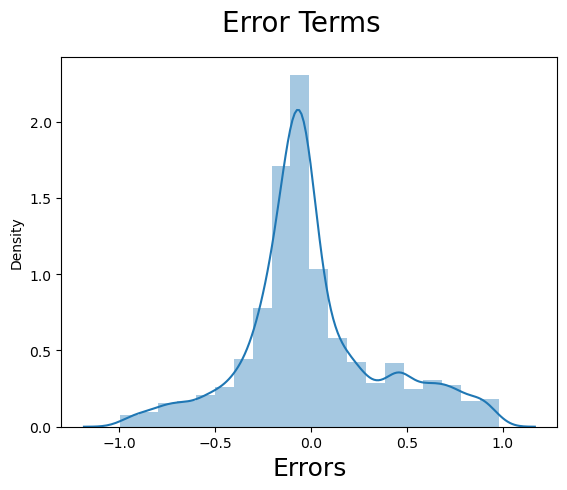

In [153]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.196697,3009
1012,0,0.125746,1012
9226,0,0.323477,9226
4750,1,0.865617,4750
7987,1,0.797752,7987


Choosing random cut-off probability point of 0.5 to find the predicted labels¶

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [157]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
3009,0,0.196697,3009,0
1012,0,0.125746,1012,0
9226,0,0.323477,9226,0
4750,1,0.865617,4750,1
7987,1,0.797752,7987,1


CONFUSION MATRIX

In [160]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


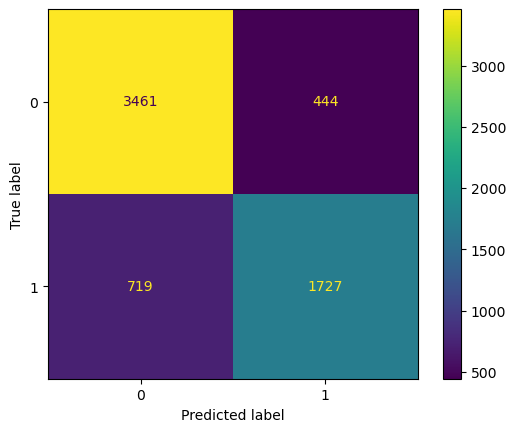

In [162]:
## Confusion matrix on the training data
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()

In [163]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [175]:
# Let's check the overall accuracy.
print("Accuracy of Trained Model:",(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)))

Accuracy of Trained Model: 0.8168792316170682


# Metrics

In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
sensitivity

0.7060506950122649

In [183]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
specificity

0.8862996158770806

In [185]:
# Calculate false postive rate - predicting converted when customer was not converted
FPR=(FP/ float(TN+FP))
FPR

0.11370038412291933

In [181]:
# positive predictive value 
print (TP / float(TP+FP))

0.7954859511745739


In [182]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8279904306220096


In [187]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

(AUC OF TRAIN DATA) 89.0




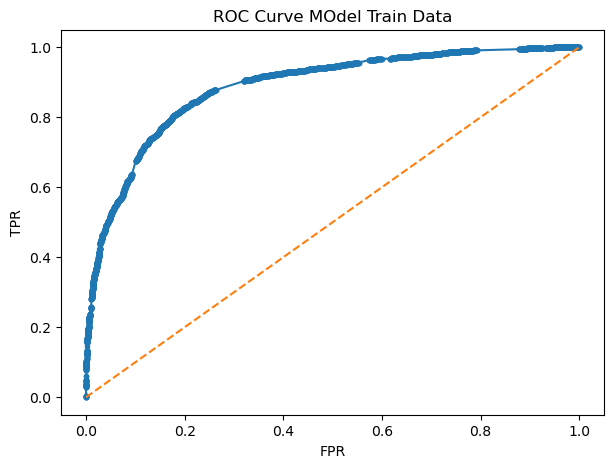

In [205]:
#Train Data Probabtlity
auc_train = roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
print('(AUC of Train Data)'.upper(), round(auc_train, 2)*100)
fpr_train, tpr_train, thresholds_train= metrics.roc_curve( y_train_pred_final.Converted,
                                                          y_train_pred_final.Converted_prob, drop_intermediate = False)
plt.figure(figsize = [7, 5])
plt.title('ROC Curve MOdel Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train, tpr_train, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');
print("\n")

# Finding the Cut off point

In [207]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
4750,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [208]:
numbers = [float(x)/10 for x in range(10)]

In [209]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [210]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [213]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
4750,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [214]:
#checking the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.814832309872461

In [216]:
#diaplaying the confusion matrox
confusion_new= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_new

array([[3226,  679],
       [ 497, 1949]], dtype=int64)

In [218]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7968111201962388

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.8261203585147248

In [221]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1738796414852753


In [222]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8665055063121139


# Precision and Recall

In [225]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3226,  679],
       [ 497, 1949]], dtype=int64)

Precision=(TP / TP + FP)

In [230]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7416286149162862

Recall=(TP / TP + FN)

In [231]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7968111201962388

In [232]:
from sklearn.metrics import precision_score, recall_score

In [233]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7416286149162862

In [234]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7968111201962388

# Trade off between Precision & Recall

In [235]:
from sklearn.metrics import precision_recall_curve

In [236]:
p_train, r_train, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [237]:
p_train

array([0.3851362 , 0.38519685, 0.38525752, ..., 1.        , 1.        ,
       1.        ])

In [238]:
r_train

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       8.17661488e-04, 4.08830744e-04, 0.00000000e+00])

In [240]:
p_train[:-1]

array([0.3851362 , 0.38519685, 0.38525752, ..., 1.        , 1.        ,
       1.        ])

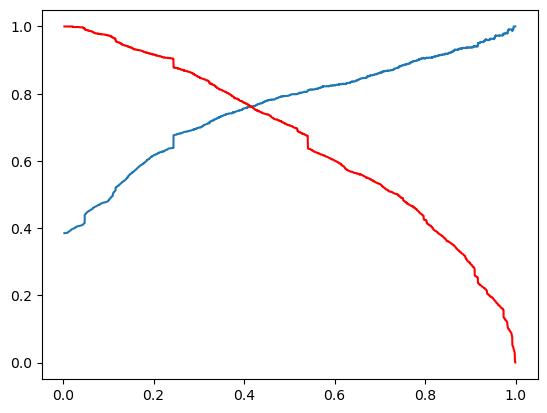

In [245]:
plt.plot(thresholds,p_train[:-1])
plt.plot(thresholds, r_train[:-1], "r-")

# Test Data prediction

In [324]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.304501,-0.591008,1.118202,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.666261,1.894051,1.728726,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.419021,-0.743117,-0.102845,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.142542,-0.878732,-1.323892,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.751544,-0.578179,1.728726,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [327]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train[col7].columns]



In [328]:
X_test_sm = sm.add_constant(X_test_new)

In [329]:
y_test_pred = res.predict(X_test_sm)

In [331]:
y_test_pred

3271    0.131537
1490    0.969277
7936    0.113643
4216    0.804712
3830    0.134137
          ...   
850     0.193047
2879    0.128742
6501    0.855708
7155    0.112977
376     0.087244
Length: 2723, dtype: float64

In [332]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [333]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [335]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [341]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [342]:
y_pred_final

,Converted,Prospect ID,0
3271,0,3271,0.131537
1490,1,1490,0.969277
7936,0,7936,0.113643
4216,1,4216,0.804712
3830,0,3830,0.134137
...,...,...,...
850,0,850,0.193047
2879,0,2879,0.128742
6501,1,6501,0.855708
7155,0,7155,0.112977


In [343]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'COnverted_Prob'})

In [345]:
y_pred_final.set_index("Prospect ID",inplace=True)

In [346]:
y_pred_final

,Converted,COnverted_Prob
Prospect ID,,
3271,0,0.131537
1490,1,0.969277
7936,0,0.113643
4216,1,0.804712
3830,0,0.134137
...,...,...
850,0,0.193047
2879,0,0.128742
6501,1,0.855708


In [348]:
y_pred_final['final_predicted'] = y_pred_final.COnverted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [349]:
y_pred_final.head()

,Converted,COnverted_Prob,final_predicted
Prospect ID,,,
3271,0,0.131537,0
1490,1,0.969277,1
7936,0,0.113643,0
4216,1,0.804712,1
3830,0,0.134137,0


In [351]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8163789937568858

In [352]:
#confusin Matrox

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1468,  266],
       [ 234,  755]], dtype=int64)

In [354]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [355]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7633973710819009

In [356]:
#  specificity
TN / float(TN+FP)

0.8465974625144176

In [358]:
y_pred_final['Lead_Score'] = y_pred_final.COnverted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,COnverted_Prob,final_predicted,Lead_Score
Prospect ID,,,,
3271,0,0.131537,0,13
1490,1,0.969277,1,97
7936,0,0.113643,0,11
4216,1,0.804712,1,80
3830,0,0.134137,0,13


Observations:
After running the model on the Test Data , we obtain:

 Accuracy : 81.6 %
 
 Sensitivity : 76.3 %
Specificity :84.6 %


In [367]:
#checking the accuracy
print("Accuracy of Train data is:",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall of the Train Data is:",metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Precision Score of the Train data is:",metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy of Train data is: 0.814832309872461
Recall of the Train Data is: 0.7968111201962388
Precision Score of the Train data is: 0.7416286149162862


In [368]:
#checking the parameters of Test Data:
print("Accuracy of Test Data is:",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Recall of the Test data is:",metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Precision Score of the Test data is",metrics.precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy of Test Data is: 0.8163789937568858
Recall of the Test data is: 0.7633973710819009
Precision Score of the Test data is 0.7394711067580804


# Inference:

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . 
The Model seems to predict the Conversion Rate to an extent of 80% 
we should be able to give theManagement confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

FInalising the LEAD to be contacted

We can consider those leads which have a conversion rate of more than 80% or lead score more than 80

In [370]:
imp_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
imp_leads

,Converted,COnverted_Prob,final_predicted,Lead_Score
Prospect ID,,,,
1490,1,0.969277,1,97
4216,1,0.804712,1,80
4223,1,0.917448,1,92
1946,1,0.925131,1,93
2461,1,0.992631,1,99
...,...,...,...,...
1566,1,0.948117,1,95
6461,1,0.961837,1,96
5741,1,0.908880,1,91


Therfore, a total of 458 leads can be called & contacted as they have a high probablity of getting convereted.

In [ ]:
# getting the PROSPECT ID's who can be contacted

In [383]:
print("Prospect ID of should be contacted are :")

np.array(list(imp_leads.index))

Prospect ID of should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 4959, 2010, 4062, 7696,
       9049, 1518, 4543, 4830, 4365, 6629, 3542, 7347, 2504, 7674, 8596,
       4003, 4963, 6947, 4807,  446,  789, 8372, 5805, 4478, 3758,  337,
       1561, 5367,  737, 9034, 2176, 3631, 6423, 8286, 7174, 4461, 1436,
       7552, 5173, 3932, 4080, 1475, 5785, 2860, 7253, 4297,  200, 5490,
       1995, 6532,  999, 4498, 5797, 8687,  831, 7653, 4149,   76, 2018,
        243, 6743, 3703, 3307, 4208, 3976, 5769, 1051, 1663, 3288, 6557,
       8976, 8959, 7521, 6177, 8282, 8213, 9063, 4462, 5292, 6913, 6015,
       1481,  785, 2985, 3265, 3285, 7433, 2460, 3384, 3685, 3858, 3810,
       2009, 8106,  373, 3055, 7417, 4179, 8076, 4994, 8568, 7268, 4353,
       6784, 6754, 7236, 5725, 2960, 7753, 3983, 4487,  802, 8745, 4455,
       4717,  505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157,
       3827, 7175, 1675, 6999, 5932, 5826, 8492, 4624, 6499, 2481, 3439,
       4612, 7468, 7129, 4793, 6649, 1557, 2121, 48

#Important Featured impacting our model

In [384]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Other_Activity                            2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Select                                  -1.202474
Do Not Email                                           -1.521825
dtype: float64

# Recommendations:¶
The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" are most likely to get converted.

The company should make calls to the leads who are the "working professionals"are more likely to get converted.


The company should make calls to the leads who spent "more time on the websites"  are more likely to get converted.

The company should make calls to the leads coming from the lead sources "Olark Chat" are more likely to get converted.

The company should make calls to the leads whose last activity was SMS Sent aare more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are NOT likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are NOT likely to get converted.

The company should not make calls to the leads whose Specialization was "Others" as they are NOT likely to get converted.

The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
